# 00 Import & Info

This project focuses on backtesting a covered call strategy on SP500 call options using Python.
The primary objective is to evaluate the performance and risk associated with this strategy.
This will be achieved by:

1.  Testing the Strategy: Applying the covered call strategy to historical options and price data,
    simulating real-market conditions.
2.  Analyzing Returns: Examining the returns generated by the strategy over the backtesting period,
    comparing it to the benchmark (SP500 index).
3.  Assessing Risk: Identifying and measuring the risks involved in implementing the strategy,
    including potential losses and volatility.

Covered calls are popular for generating income and potentially enhancing returns in a moderately
bullish or sideways market. However, they also limit potential upside if the underlying asset price
rises significantly.

The backtesting process will involve:

1. Data Acquisition: Gathering historical data on SP500 option prices and the underlying asset's price.
2. Strategy Implementation: Defining the rules for entering and exiting covered call positions.
3. Performance Measurement: Calculating key performance metrics, such as total return, Sharpe ratio,
   and maximum drawdown.
4. Risk Assessment: Evaluating risk measures, including volatility and Value at Risk (VaR).
5. Analysis and Optimization: Analyzing the backtesting results and identifying potential areas for
   strategy improvement.

Ultimately, this project aims to provide a comprehensive analysis of the covered call strategy on the
SP500, offering insights into its potential benefits and risks.

Disclaimer: Backtesting results are hypothetical and do not guarantee future performance.
Actual trading may yield different outcomes.

##Option data
https://www.optionsdx.com/
https://www.optionsdx.com/option-chain-field-definitions/


In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical and time series analysis
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Machine learning metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay

# XGBoost for advanced modeling
import xgboost as xgb

# Yahoo Finance API for stock data retrieval
import yfinance as yf

# Google Colab integration for accessing Google Drive
from google.colab import drive

# Suppress warnings
import warnings

# Set visualization style
plt.style.use('ggplot')

In [ ]:
!pip install pandas_ta

import pandas_ta as ta

In [ ]:
pip install arch

from arch import arch_model

#01 Load Data

In [ ]:
drive.mount('/content/drive',force_remount=True)
#!ls "/content/drive/My Drive/Colab Notebooks"

Mounted at /content/drive


List of stored fiels, one month equals one text file

In [ ]:
fileName = [
'spy_eod_201001.txt',
'spy_eod_201002.txt',
'spy_eod_201003.txt',
'spy_eod_201004.txt',
'spy_eod_201005.txt',
'spy_eod_201006.txt',
'spy_eod_201007.txt',
'spy_eod_201008.txt',
'spy_eod_201009.txt',
'spy_eod_201010.txt',
'spy_eod_201011.txt',
'spy_eod_201012.txt',

'spy_eod_201101.txt',
'spy_eod_201102.txt',
'spy_eod_201103.txt',
'spy_eod_201104.txt',
'spy_eod_201105.txt',
'spy_eod_201106.txt',
'spy_eod_201107.txt',
'spy_eod_201108.txt',
'spy_eod_201109.txt',
'spy_eod_201110.txt',
'spy_eod_201111.txt',
'spy_eod_201112.txt',

'spy_eod_201201.txt',
'spy_eod_201202.txt',
'spy_eod_201203.txt',
'spy_eod_201204.txt',
'spy_eod_201205.txt',
'spy_eod_201206.txt',
'spy_eod_201207.txt',
'spy_eod_201208.txt',
'spy_eod_201209.txt',
'spy_eod_201210.txt',
'spy_eod_201211.txt',
'spy_eod_201212.txt',

'spy_eod_201301.txt',
'spy_eod_201302.txt',
'spy_eod_201303.txt',
'spy_eod_201304.txt',
'spy_eod_201305.txt',
'spy_eod_201306.txt',
'spy_eod_201307.txt',
'spy_eod_201308.txt',
'spy_eod_201309.txt',
'spy_eod_201310.txt',
'spy_eod_201311.txt',
'spy_eod_201312.txt',

'spy_eod_201401.txt',
'spy_eod_201402.txt',
'spy_eod_201403.txt',
'spy_eod_201404.txt',
'spy_eod_201405.txt',
'spy_eod_201406.txt',
'spy_eod_201407.txt',
'spy_eod_201408.txt',
'spy_eod_201409.txt',
'spy_eod_201410.txt',
'spy_eod_201411.txt',
'spy_eod_201412.txt',

'spy_eod_201501.txt',
'spy_eod_201502.txt',
'spy_eod_201503.txt',
'spy_eod_201504.txt',
'spy_eod_201505.txt',
'spy_eod_201506.txt',
'spy_eod_201507.txt',
'spy_eod_201508.txt',
'spy_eod_201509.txt',
'spy_eod_201510.txt',
'spy_eod_201511.txt',
'spy_eod_201512.txt',

'spy_eod_201601.txt',
'spy_eod_201602.txt',
'spy_eod_201603.txt',
'spy_eod_201604.txt',
'spy_eod_201605.txt',
'spy_eod_201606.txt',
'spy_eod_201607.txt',
'spy_eod_201608.txt',
'spy_eod_201609.txt',
'spy_eod_201610.txt',
'spy_eod_201611.txt',
'spy_eod_201612.txt',

'spy_eod_201701.txt',
'spy_eod_201702.txt',
'spy_eod_201703.txt',
'spy_eod_201704.txt',
'spy_eod_201705.txt',
'spy_eod_201706.txt',
'spy_eod_201707.txt',
'spy_eod_201708.txt',
'spy_eod_201709.txt',
'spy_eod_201710.txt',
'spy_eod_201711.txt',
'spy_eod_201712.txt',

'spy_eod_201801.txt',
'spy_eod_201802.txt',
'spy_eod_201803.txt',
'spy_eod_201804.txt',
'spy_eod_201805.txt',
'spy_eod_201806.txt',
'spy_eod_201807.txt',
'spy_eod_201808.txt',
'spy_eod_201809.txt',
'spy_eod_201810.txt',
'spy_eod_201811.txt',
'spy_eod_201812.txt',

'spy_eod_201901.txt',
'spy_eod_201902.txt',
'spy_eod_201903.txt',
'spy_eod_201904.txt',
'spy_eod_201905.txt',
'spy_eod_201906.txt',
'spy_eod_201907.txt',
'spy_eod_201908.txt',
'spy_eod_201909.txt',
'spy_eod_201910.txt',
'spy_eod_201911.txt',
'spy_eod_201912.txt',

'spy_eod_202001.txt',
'spy_eod_202002.txt',
'spy_eod_202003.txt',
'spy_eod_202004.txt',
'spy_eod_202005.txt',
'spy_eod_202006.txt',
'spy_eod_202007.txt',
'spy_eod_202008.txt',
'spy_eod_202009.txt',
'spy_eod_202010.txt',
'spy_eod_202011.txt',
'spy_eod_202012.txt',

'spy_eod_202101.txt',
'spy_eod_202102.txt',
'spy_eod_202103.txt',
'spy_eod_202104.txt',
'spy_eod_202105.txt',
'spy_eod_202106.txt',
'spy_eod_202107.txt',
'spy_eod_202108.txt',
'spy_eod_202109.txt',
'spy_eod_202110.txt',
'spy_eod_202111.txt',
'spy_eod_202112.txt',

'spy_eod_202201.txt',
'spy_eod_202202.txt',
'spy_eod_202203.txt',
'spy_eod_202204.txt',
'spy_eod_202205.txt',
'spy_eod_202206.txt',
'spy_eod_202207.txt',
'spy_eod_202208.txt',
'spy_eod_202209.txt',
'spy_eod_202210.txt',
'spy_eod_202211.txt',
'spy_eod_202212.txt',

'spy_eod_202301.txt',
'spy_eod_202302.txt',
'spy_eod_202303.txt',
'spy_eod_202304.txt',
'spy_eod_202305.txt',
'spy_eod_202306.txt',
'spy_eod_202307.txt',
'spy_eod_202308.txt',
'spy_eod_202309.txt',
'spy_eod_202310.txt',
'spy_eod_202311.txt',
'spy_eod_202312.txt'
]

In [ ]:
adress = '/content/drive/My Drive/Colab Notebooks/BPJO/'

Loading and merging, [DTE] > 15 is dropped in order to save memory.

In [ ]:
warnings.filterwarnings("ignore")

adressFile = adress+fileName[0]
data = pd.read_csv(adressFile)

for x in fileName[1:]:

  adressFile = adress+x
  dataUp = pd.read_csv(adressFile)
  dataUp = dataUp[dataUp[' [DTE]'] <= 15]  #DTE tady

  data = pd.concat([data, dataUp], ignore_index=True)

In [ ]:
data

[QUOTE_UNIXTIME]   [QUOTE_READTIME]  [QUOTE_DATE]  \
0              1262638800   2010-01-04 16:00    2010-01-04   
1              1262638800   2010-01-04 16:00    2010-01-04   
2              1262638800   2010-01-04 16:00    2010-01-04   
3              1262638800   2010-01-04 16:00    2010-01-04   
4              1262638800   2010-01-04 16:00    2010-01-04   
...                   ...                ...           ...   
1880939        1703883600   2023-12-29 16:00    2023-12-29   
1880940        1703883600   2023-12-29 16:00    2023-12-29   
1880941        1703883600   2023-12-29 16:00    2023-12-29   
1880942        1703883600   2023-12-29 16:00    2023-12-29   
1880943        1703883600   2023-12-29 16:00    2023-12-29   

          [QUOTE_TIME_HOURS]   [UNDERLYING_LAST]  [EXPIRE_DATE]  \
0                       16.0              113.29     2010-01-15   
1                       16.0              113.29     2010-01-15   
2                       16.0              113.29     2010-01-15   
3                       16.0              113.29     2010-01-15   
4                       16.0              113.29     2010-01-15   
...                      ...                 ...            ...   
1880939                 16.0              475.31     2024-01-12   
1880940                 16.0              475.31     2024-01-12   
1880941                 16.0              475.31     2024-01-12   
1880942                 16.0              475.31     2024-01-12   
1880943                 16.0              475.31     2024-01-12   

          [EXPIRE_UNIX]   [DTE]  [C_DELTA]  [C_GAMMA]  ...   [P_LAST]  \
0            1263589200    11.0    0.88304    0.00005  ...   0.020000   
1            1263589200    11.0    0.88398    0.00005  ...   0.000000   
2            1263589200    11.0    0.88657        0.0  ...   0.030000   
3            1263589200    11.0     0.8875    0.00003  ...   0.040000   
4            1263589200    11.0     0.8897    0.00007  ...   0.040000   
...                 ...     ...        ...        ...  ...        ...   
1880939      1705093200    14.0    0.00296     0.0005  ...      70.08   
1880940      1705093200    14.0    0.00155    0.00022  ...      70.83   
1880941      1705093200    14.0     0.0014    0.00021  ...        0.0   
1880942      1705093200    14.0    0.00061    0.00019  ...      84.11   
1880943      1705093200    14.0    0.00066    0.00016  ...        0.0   

         [P_DELTA]  [P_GAMMA]  [P_VEGA]  [P_THETA]  [P_RHO]     [P_IV]  \
0         -0.00143     0.0001   0.00074   -0.00435  -0.0005   1.367420   
1          -0.0016     0.0002   0.00074   -0.00396 -0.00043   1.334760   
2         -0.00146    0.00014   0.00106   -0.00369 -0.00004   1.306550   
3         -0.00166    0.00017   0.00056   -0.00428 -0.00051   1.272370   
4         -0.00167    0.00016   0.00128   -0.00429 -0.00023   1.244210   
...            ...        ...       ...        ...      ...        ...   
1880939   -0.95036    0.00333   0.08723   -0.07191 -0.05247   0.303960   
1880940   -0.95353    0.00255   0.07976    -0.0722  -0.0426   0.320310   
1880941   -0.94997    0.00228   0.08679   -0.08639 -0.04816   0.350780   
1880942   -0.94427    0.00217    0.0944   -0.10431  -0.0541   0.383790   
1880943   -0.95084    0.00132   0.08185   -0.00499 -0.03615   0.388830   

         [P_VOLUME]  [STRIKE_DISTANCE]   [STRIKE_DISTANCE_PCT]  
0          0.000000               58.3                   0.515  
1                                 57.3                   0.506  
2          0.000000               56.3                   0.497  
3          0.000000               55.3                   0.488  
4          0.000000               54.3                   0.479  
...             ...                ...                     ...  
1880939    0.000000               49.7                   0.105  
1880940    0.000000               54.7                   0.115  
1880941                           59.7                   0.126  
1880942    0.000000               64.7     

## Get Price Data

In [ ]:
data = data.rename(columns={' [UNDERLYING_LAST]': 'Close'})

In [ ]:
print(data.columns)

Index(['[QUOTE_UNIXTIME]', ' [QUOTE_READTIME]', ' [QUOTE_DATE]',
       ' [QUOTE_TIME_HOURS]', 'Close', ' [EXPIRE_DATE]', ' [EXPIRE_UNIX]',
       ' [DTE]', ' [C_DELTA]', ' [C_GAMMA]', ' [C_VEGA]', ' [C_THETA]',
       ' [C_RHO]', ' [C_IV]', ' [C_VOLUME]', ' [C_LAST]', ' [C_SIZE]',
       ' [C_BID]', ' [C_ASK]', ' [STRIKE]', ' [P_BID]', ' [P_ASK]',
       ' [P_SIZE]', ' [P_LAST]', ' [P_DELTA]', ' [P_GAMMA]', ' [P_VEGA]',
       ' [P_THETA]', ' [P_RHO]', ' [P_IV]', ' [P_VOLUME]',
       ' [STRIKE_DISTANCE]', ' [STRIKE_DISTANCE_PCT]'],
      dtype='object')


In [ ]:
dataPrice = data[[' [QUOTE_READTIME]', 'Close']].copy()

In [ ]:
dataPrice = dataPrice.drop_duplicates()
dataPrice[' [QUOTE_READTIME]'] = pd.to_datetime(dataPrice[' [QUOTE_READTIME]']).dt.tz_localize(None)

dataPrice.set_index(' [QUOTE_READTIME]', inplace=True)

In [ ]:
dataPrice

Close
 [QUOTE_READTIME]          
2010-01-04 16:00:00  113.29
2010-01-05 16:00:00  113.64
2010-01-06 16:00:00  113.74
2010-01-07 16:00:00  114.20
2010-01-08 16:00:00  114.54
...                     ...
2023-12-22 16:00:00  473.68
2023-12-26 16:00:00  475.61
2023-12-27 16:00:00  476.47
2023-12-28 16:00:00  476.73
2023-12-29 16:00:00  475.31

[3477 rows x 1 columns]

Monday

#02 Data Preparation

Switch here for Monthy etc.

In [ ]:
weekly_dataPrice = dataPrice.resample('W-FRI').last()

DTE = 7 # Days to expiration

trainTestSplit = '2018-01-01'

In [ ]:
weekly_dataPrice = weekly_dataPrice.rename(columns={' [UNDERLYING_LAST]': 'Close'})

In [ ]:
weekly_dataPrice['priceLaged'] = weekly_dataPrice['Close'].shift(1)
weekly_dataPrice['priceTarget'] = weekly_dataPrice['Close'].shift(-1)

weekly_dataPrice['logReturnLag0'] = np.log(weekly_dataPrice['Close'] / weekly_dataPrice['Close'].shift(1))*100
weekly_dataPrice['logReturnLag1'] = weekly_dataPrice['logReturnLag0'].shift(1)
weekly_dataPrice['logReturnLag2'] = weekly_dataPrice['logReturnLag0'].shift(2)

weekly_dataPrice['logReturnLag02'] = np.log(weekly_dataPrice['Close'] / weekly_dataPrice['Close'].shift(2))*100
weekly_dataPrice['logReturnLag04'] = np.log(weekly_dataPrice['Close'] / weekly_dataPrice['Close'].shift(4))*100


weekly_dataPrice['logReturnTarget'] = weekly_dataPrice['logReturnLag0'].shift(-1)


weekly_dataPrice['logReturnSum'] = weekly_dataPrice['logReturnLag0'].cumsum()

weekly_dataPrice['logReturnRollingStd'] = weekly_dataPrice['logReturnLag0'].rolling(window=10).std()

In [ ]:
weekly_dataPrice = weekly_dataPrice.rename_axis('Date')

##Feature Engineering

In [ ]:
def AddEmaFCE(df, lengths):
  column = "Close"

  for length in lengths:
    column_name = f"ema_{length}"
    df[column_name] = ta.ema(df[column], length=length)

    #Relativizace
    df[column_name] = df[column_name]/df["Close"]
  return df


def AddRsiFCE(df, lengths):
  column = "Close"

  for length in lengths:
    column_name = f"rsi_{length}"
    df[column_name] = ta.rsi(df[column], length=length)
  return df


def AddRocFCE(df, lengths):
  column = "Close"

  for length in lengths:
    column_name = f"roc_{length}"
    df[column_name] = ta.roc(df[column], length=length)
  return df


#ta.trend.MACD(close: pandas.core.series.Series, window_slow: int = 26, window_fast: int = 12, window_sign: int = 9, fillna: bool = False)

In [ ]:
lengths = [3,5,7,15]
#lengths2 = [7,15,30,50,75,110,200]

#spDf = AddReturnsFCE(spDf)
weekly_dataPrice = AddEmaFCE(weekly_dataPrice, lengths)
weekly_dataPrice = AddRsiFCE(weekly_dataPrice, lengths)
weekly_dataPrice = AddRocFCE(weekly_dataPrice, lengths)
#spDf = AddEfiFCE(spDf, lengths)


Treshold weekly_dataPricePlot

In [ ]:
data

[QUOTE_UNIXTIME]   [QUOTE_READTIME]  [QUOTE_DATE]  \
0              1262638800   2010-01-04 16:00    2010-01-04   
1              1262638800   2010-01-04 16:00    2010-01-04   
2              1262638800   2010-01-04 16:00    2010-01-04   
3              1262638800   2010-01-04 16:00    2010-01-04   
4              1262638800   2010-01-04 16:00    2010-01-04   
...                   ...                ...           ...   
1880939        1703883600   2023-12-29 16:00    2023-12-29   
1880940        1703883600   2023-12-29 16:00    2023-12-29   
1880941        1703883600   2023-12-29 16:00    2023-12-29   
1880942        1703883600   2023-12-29 16:00    2023-12-29   
1880943        1703883600   2023-12-29 16:00    2023-12-29   

          [QUOTE_TIME_HOURS]   Close  [EXPIRE_DATE]   [EXPIRE_UNIX]   [DTE]  \
0                       16.0  113.29     2010-01-15      1263589200    11.0   
1                       16.0  113.29     2010-01-15      1263589200    11.0   
2                       16.0  113.29     2010-01-15      1263589200    11.0   
3                       16.0  113.29     2010-01-15      1263589200    11.0   
4                       16.0  113.29     2010-01-15      1263589200    11.0   
...                      ...     ...            ...             ...     ...   
1880939                 16.0  475.31     2024-01-12      1705093200    14.0   
1880940                 16.0  475.31     2024-01-12      1705093200    14.0   
1880941                 16.0  475.31     2024-01-12      1705093200    14.0   
1880942                 16.0  475.31     2024-01-12      1705093200    14.0   
1880943                 16.0  475.31     2024-01-12      1705093200    14.0   

         [C_DELTA]  [C_GAMMA]  ...   [P_LAST]  [P_DELTA]  [P_GAMMA]  [P_VEGA]  \
0          0.88304    0.00005  ...   0.020000   -0.00143     0.0001   0.00074   
1          0.88398    0.00005  ...   0.000000    -0.0016     0.0002   0.00074   
2          0.88657        0.0  ...   0.030000   -0.00146    0.00014   0.00106   
3           0.8875    0.00003  ...   0.040000   -0.00166    0.00017   0.00056   
4           0.8897    0.00007  ...   0.040000   -0.00167    0.00016   0.00128   
...            ...        ...  ...        ...        ...        ...       ...   
1880939    0.00296     0.0005  ...      70.08   -0.95036    0.00333   0.08723   
1880940    0.00155    0.00022  ...      70.83   -0.95353    0.00255   0.07976   
1880941     0.0014    0.00021  ...        0.0   -0.94997    0.00228   0.08679   
1880942    0.00061    0.00019  ...      84.11   -0.94427    0.00217    0.0944   
1880943    0.00066    0.00016  ...        0.0   -0.95084    0.00132   0.08185   

         [P_THETA]  [P_RHO]     [P_IV]  [P_VOLUME]  [STRIKE_DISTANCE]  \
0         -0.00435  -0.0005   1.367420    0.000000               58.3   
1         -0.00396 -0.00043   1.334760                           57.3   
2         -0.00369 -0.00004   1.306550    0.000000               56.3   
3         -0.00428 -0.00051   1.272370    0.000000               55.3   
4         -0.00429 -0.00023   1.244210    0.000000               54.3   
...            ...      ...        ...         ...                ...   
1880939   -0.07191 -0.05247   0.303960    0.000000               49.7   
1880940    -0.0722  -0.0426   0.320310    0.000000               54.7   
1880941   -0.08639 -0.04816   0.350780                           59.7   
1880942   -0.10431  -0.0541   0.383790    0.000000               64.7   
1880943   -0.00499 -0.03615   0.388830                           69.7   

          [STRIKE_DISTANCE_PCT]  
0                         0.515  
1                         0.506  
2                         0.497  
3                         0.488  
4                         0.479  
...                         ...  
1880939                   0.105  
1880940                   0.115  
1880941                   0.126  
1880942                   0.136  
1880943                   0.147  

[1880944 rows x 33 columns]

In [ ]:
data[' [QUOTE_DATE]'] = pd.to_datetime(data[' [QUOTE_DATE]'])


data = data[data[' [DTE]'] == DTE]

#Limit data to closer range
data = data[data[' [STRIKE_DISTANCE_PCT]'] < 0.0710]
data = data[data[' [STRIKE_DISTANCE_PCT]'] > -0.0710]


data[' [STRIKE_DISTANCE_PCT]'] = data[' [STRIKE]'].astype(float)/data['Close']-1

#Deal with errors
data[' [C_LAST]'] = data[' [C_LAST]'].apply(pd.to_numeric, errors='coerce').fillna(0)
data[' [P_LAST]'] = data[' [P_LAST]'].apply(pd.to_numeric, errors='coerce').fillna(0)
data[' [C_DELTA]'] = data[' [C_DELTA]'].apply(pd.to_numeric, errors='coerce').fillna(0)
data[' [P_DELTA]'] = data[' [P_DELTA]'].apply(pd.to_numeric, errors='coerce').fillna(0)

data[' [C_ASK]'] = data[' [C_ASK]'].apply(pd.to_numeric, errors='coerce').fillna(0)
data[' [C_BID]'] = data[' [C_BID]'].apply(pd.to_numeric, errors='coerce').fillna(0)
data[' [P_ASK]'] = data[' [P_ASK]'].apply(pd.to_numeric, errors='coerce').fillna(0)
data[' [P_BID]'] = data[' [P_BID]'].apply(pd.to_numeric, errors='coerce').fillna(0)

#data = data[data[' [C_LAST]'].astype(float) > (data["Close"]/200)]

#Noramlized features
data[' [C_LAST_Norm]'] = data[' [C_LAST]'].astype(float) /data["Close"]
data[' [P_LAST_Norm]'] = data[' [P_LAST]'].astype(float) /data["Close"]

data[' [C_DELTA_Norm]'] = data[' [C_DELTA]'].astype(float) /data["Close"]
data[' [P_DELTA_Norm]'] = data[' [P_DELTA]'].astype(float) /data["Close"]

#Spread between BID and ASK
data['SPREAD_C'] = (data[' [C_ASK]'] - data[' [C_BID]'])/data["Close"]
data['SPREAD_P'] = (data[' [P_ASK]'] - data[' [P_BID]'])/data["Close"]

data['SPREAD_CP'] = (data[' [C_ASK]'] - data[' [P_ASK]'])/data["Close"]

#data["ITM"] = (data[' [STRIKE]'] < data["priceTarget"]).astype(int)
#data = data.dropna()

#03 Data Exploration

In [ ]:
weekly_dataPricePlot = weekly_dataPrice[weekly_dataPrice.index >= '2011-01-01'].copy()
weekly_dataPricePlot['logReturnSum'] = weekly_dataPricePlot.logReturnLag0.cumsum()

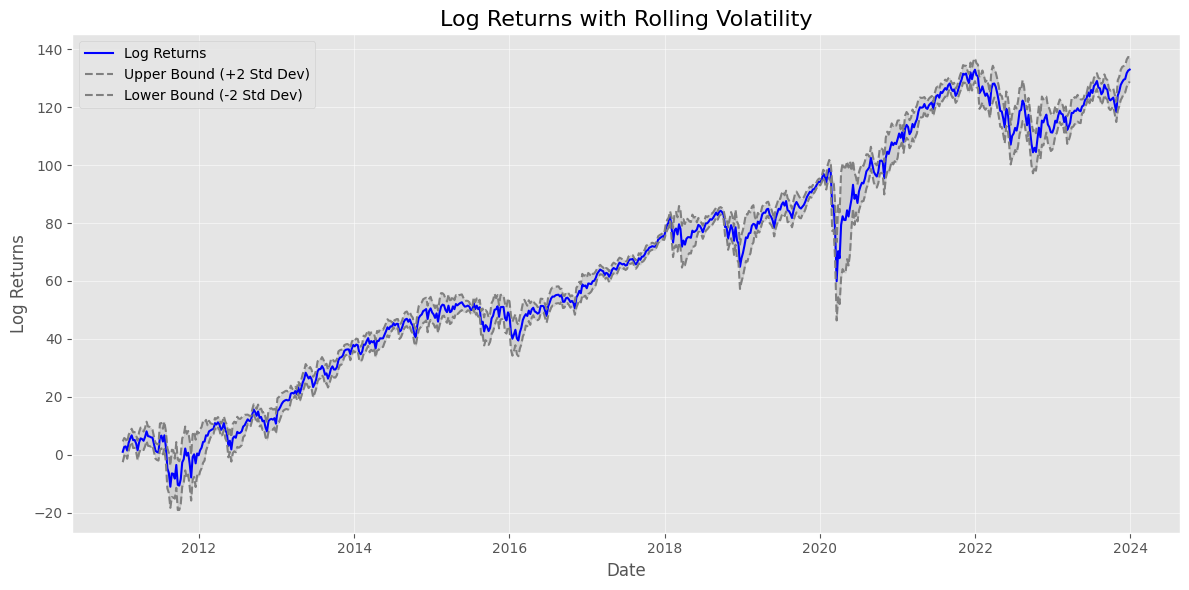

In [ ]:
plt.figure(figsize=(12, 6))

# Plot the log returns and the confidence intervals
plt.plot(weekly_dataPricePlot['logReturnSum'], label='Log Returns', color='blue')
plt.plot(weekly_dataPricePlot['logReturnSum'] + weekly_dataPricePlot['logReturnRollingStd'] * 2,
         label='Upper Bound (+2 Std Dev)', color='gray', linestyle='--')
plt.plot(weekly_dataPricePlot['logReturnSum'] - weekly_dataPricePlot['logReturnRollingStd'] * 2,
         label='Lower Bound (-2 Std Dev)', color='gray', linestyle='--')

# Add a shaded region for the confidence interval
plt.fill_between(weekly_dataPricePlot.index,
                 weekly_dataPricePlot['logReturnSum'] + weekly_dataPricePlot['logReturnRollingStd'] * 2,
                 weekly_dataPricePlot['logReturnSum'] - weekly_dataPricePlot['logReturnRollingStd'] * 2,
                 color='gray', alpha=0.2)

# Enhance plot aesthetics
plt.title('Log Returns with Rolling Volatility', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Log Returns', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.5)  # Adjust grid visibility
plt.tight_layout()  # Adjust layout for better spacing

plt.show()

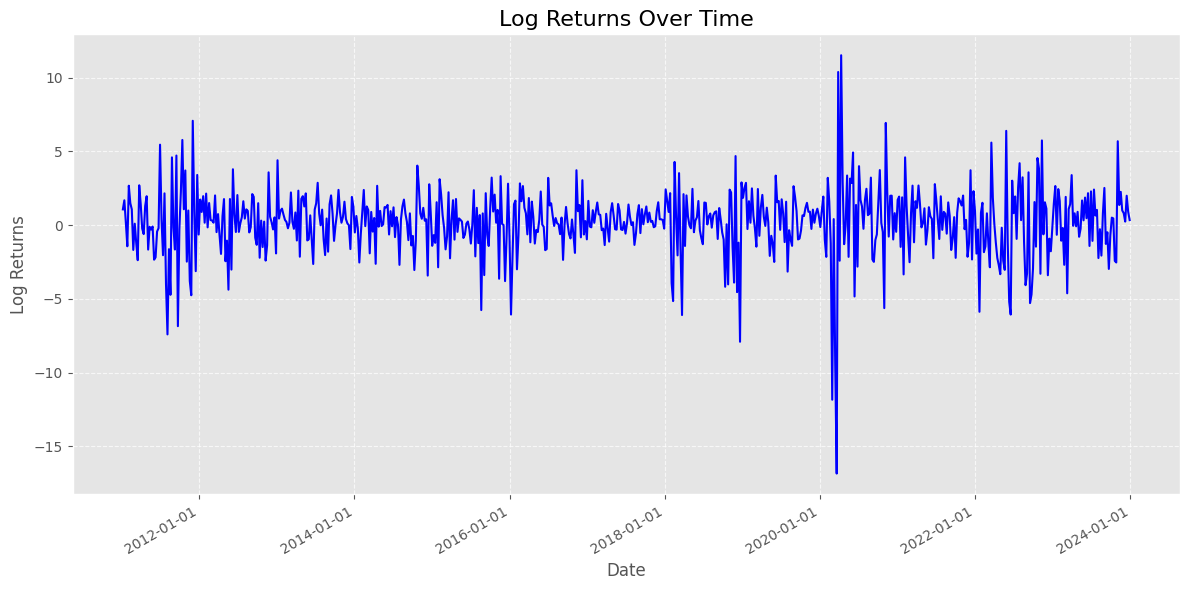

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize=(12, 6))

# Plot the log returns with styling
plt.plot(weekly_dataPricePlot.index, weekly_dataPricePlot['logReturnLag0'],
         color='blue', linewidth=1.5, linestyle='-')

# Customize the plot
plt.title('Log Returns Over Time', fontsize=16)  # More descriptive title
plt.xlabel('Date', fontsize=12)  # Changed x-axis label to 'Date'
plt.ylabel('Log Returns', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid with styling

# Format the x-axis to show dates (assuming your index is a DateTimeIndex)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format dates
plt.gcf().autofmt_xdate()  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

##Mean Std

In [ ]:
log_returns = weekly_dataPricePlot['logReturnLag0']
log_returns = log_returns.dropna()

# Summary Statistics
mean = log_returns.mean()
std_dev = log_returns.std()
skewness = log_returns.skew()
kurtosis = log_returns.kurtosis()

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Mean: 0.19608154478272208
Standard Deviation: 2.273735933558178
Skewness: -0.8790513949558423
Kurtosis: 7.637930607639022


##Histogram and Density Plot

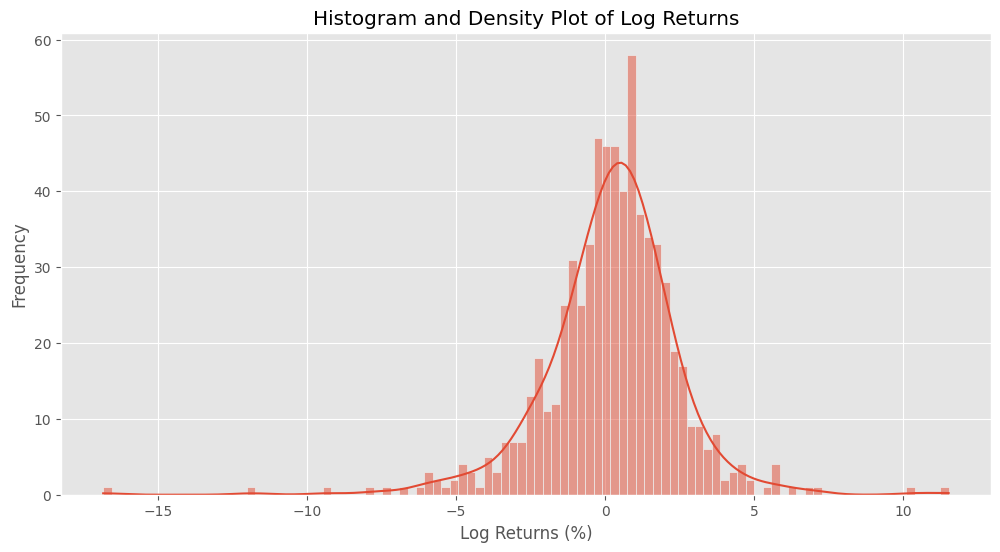

In [ ]:

plt.figure(figsize=(12, 6))
sns.histplot(log_returns, bins=100, kde=True)
plt.title('Histogram and Density Plot of Log Returns')
plt.xlabel('Log Returns (%)')
plt.ylabel('Frequency')
plt.show()


##ACF PACF

<Figure size 1200x600 with 0 Axes>

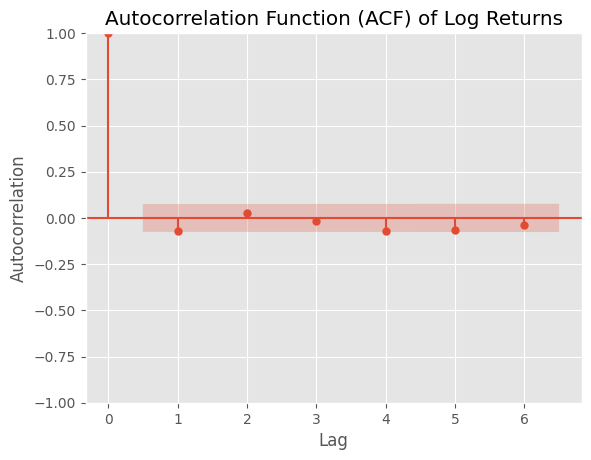

<Figure size 1200x600 with 0 Axes>

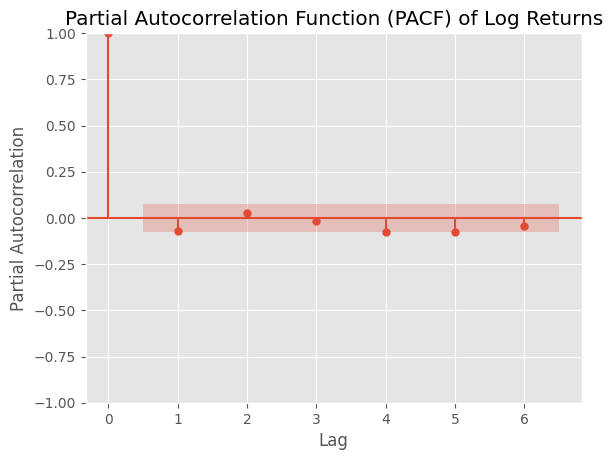

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Plotting the Autocorrelation Function (ACF)
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_acf(log_returns, lags=6)
plt.title('Autocorrelation Function (ACF) of Log Returns')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plotting the Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(log_returns, lags=6)
plt.title('Partial Autocorrelation Function (PACF) of Log Returns')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


##Normality Q-Q plot

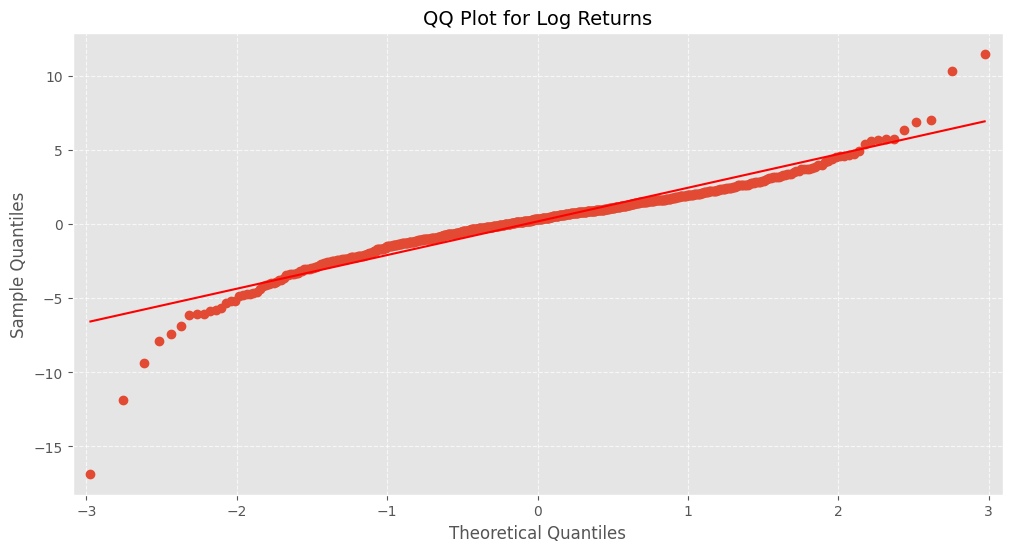

Shapiro-Wilk Test Results:
  Statistic: 0.9211
  P-value:   0.0000

The data does not appear to be normally distributed (p-value < 0.05).


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

# Normality Test using QQ Plot
fig, ax = plt.subplots(figsize=(12, 6))
sm.qqplot(log_returns, line='s', ax=ax)

ax.set_title('QQ Plot for Log Returns', fontsize=14)
ax.set_xlabel('Theoretical Quantiles', fontsize=12)
ax.set_ylabel('Sample Quantiles', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

plt.show()

# Normality Test using Shapiro-Wilk Test
shapiro_test = stats.shapiro(log_returns)

print("Shapiro-Wilk Test Results:")
print(f"  Statistic: {shapiro_test.statistic:.4f}")
print(f"  P-value:   {shapiro_test.pvalue:.4f}")

# Interpretation
alpha = 0.05
if shapiro_test.pvalue < alpha:
    print(f"\nThe data does not appear to be normally distributed (p-value < {alpha}).")
else:
    print(f"\nThe data appears to be normally distributed (p-value >= {alpha}).")

p-val > 0.05 ---- Normal

#04 Estimation - Econometric

LogRet GARCH

In [ ]:
weekly_dataPriceGARCH = weekly_dataPrice[weekly_dataPrice.index >= '2010-12-01'].copy()
log_returnsGARCH = weekly_dataPriceGARCH['logReturnLag0']

weekly_dataPrice = weekly_dataPrice[weekly_dataPrice.index >= '2010-12-31']

###GARCH

In [ ]:
def ValAtRiskFCE(cond_mean, cond_var, q):
  value_at_risk = -cond_mean.values - np.sqrt(cond_var).values * q[None, :]
  value_at_risk = pd.DataFrame(value_at_risk, columns=["1%", "5%", "20%"], index=cond_var.index)

  return value_at_risk

In [ ]:
# Define the range of p and q to try
p_values = range(1, 6)
q_values = range(1, 6)

# Initialize variables to store the best values of p, q, and the corresponding AIC
best_p = None
best_q = None
best_aic = np.inf  # Start with a very high AIC

# Loop over all possible combinations of p and q
for p in p_values:
    for q in q_values:
        try:
            # Estimate the GARCH model with the current p and q values
            am = arch_model(log_returnsGARCH, vol="Garch", p=p, o=0, q=q, dist="skewt")
            res = am.fit(disp="off", last_obs= trainTestSplit)

            # Check if the current model has a lower AIC than the best found so far
            if res.aic < best_aic:
                best_p, best_q = p, q
                best_aic = res.aic
        except:
            # Handle any exceptions that occur during the fitting process
            continue

# Print the results of the best model found
print(f"Optimal values found: p = {best_p}, q = {best_q} with AIC = {best_aic}")


Optimal values found: p = 1, q = 1 with AIC = 1401.1058944600245


In [ ]:
p = 1
q = 1

am = arch_model(log_returnsGARCH, vol="Garch", p=p, o=0, q=q, dist="skewt")
res = am.fit(disp="off", last_obs=trainTestSplit)

q = am.distribution.ppf([0.01, 0.05, 0.2], res.params[-2:])


In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - GARCH Model Results                           
=========================================================================================
Dep. Variable:                     logReturnLag0   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -694.553
Distribution:      Standardized Skew Student's t   AIC:                           1401.11
Method:                       Maximum Likelihood   BIC:                           1424.59
                                                   No. Observations:                  370
Date:                           Wed, Nov 13 2024   Df Residuals:                      369
Time:                                   00:28:33   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2624  7.911e-02      3.317  9.115e-04 [  0.107,  0.417]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1395      0.191      0.730      0.465    [ -0.235,  0.514]
alpha[1]       0.1678  9.550e-02      1.757  7.890e-02 [-1.938e-02,  0.355]
beta[1]        0.7908      0.146      5.415  6.132e-08    [  0.505,  1.077]
                                Distribution                               
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
eta            7.6671      2.978      2.575  1.004e-02    [  1.830, 13.504]
lambda        -0.1562  6.554e-02     -2.384  1.712e-02 [ -0.285,-2.779e-02]
===========================================================================

Covariance estimator: robust
"""

Value at Risk

In [ ]:
forecasts = res.forecast(start='2010-01-01', reindex=False, align="target")

cond_mean = forecasts.mean.dropna()
cond_var = forecasts.variance.dropna()


value_at_riskDf = ValAtRiskFCE(cond_mean, cond_var, q)

In [ ]:
weekly_dataPrice["GARCH11_1"] = value_at_riskDf["1%"]
weekly_dataPrice["GARCH11_5"] = value_at_riskDf["5%"]
weekly_dataPrice["GARCH11_20"] = value_at_riskDf["20%"]

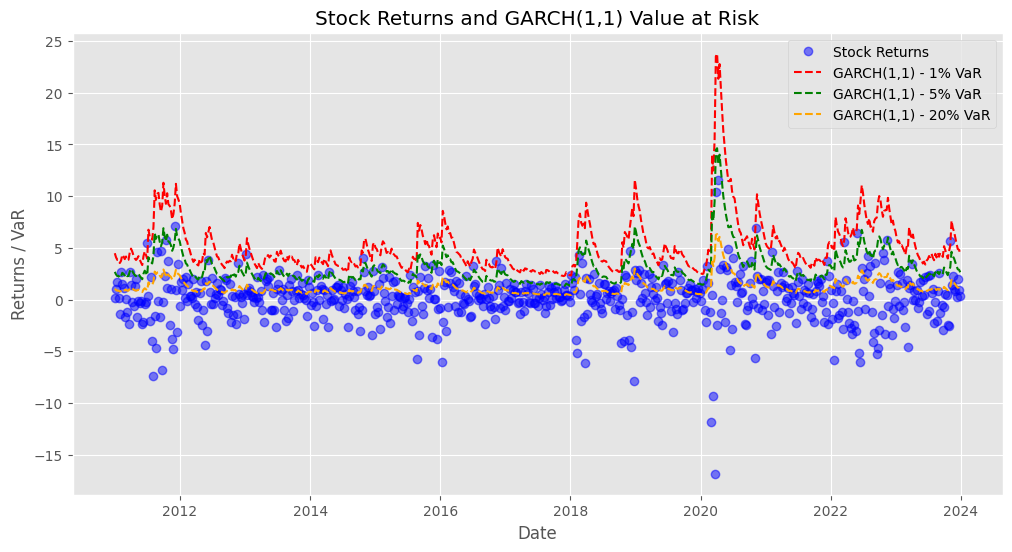

In [ ]:
# Assuming 'weekly_dataPrice' is your DataFrame
plt.figure(figsize=(12, 6))

# Plot underlying stock returns
plt.plot(weekly_dataPrice['logReturnLag0'], label='Stock Returns', color='blue', marker='o', linestyle='', alpha = 0.5)

# Plot GARCH lines (Value at Risk)
plt.plot(weekly_dataPrice['GARCH11_1'], label='GARCH(1,1) - 1% VaR', color='red', linestyle='--')
plt.plot(weekly_dataPrice['GARCH11_5'], label='GARCH(1,1) - 5% VaR', color='green', linestyle='--')
plt.plot(weekly_dataPrice['GARCH11_20'], label='GARCH(1,1) - 20% VaR', color='orange', linestyle='--')

# Add title, labels, and legend
plt.title('Stock Returns and GARCH(1,1) Value at Risk')
plt.xlabel('Date')
plt.ylabel('Returns / VaR')
plt.legend(loc='best')

# Show the plot
plt.show()

#05 Estimation - Machine Learning

In [ ]:
dataExtended = pd.merge(data, weekly_dataPrice, on='Close', how='inner')


dataExtended["ITM"] = (dataExtended[' [STRIKE]'] < dataExtended["priceTarget"]).astype(int)
#data = data.dropna()

In [ ]:
def clean_col_name(col):
    return col.replace('[', '').replace(']', '').replace('<', '').replace(' ', '')

dataExtended = dataExtended.rename(columns=clean_col_name)

## Features Selection and Metrices

In [ ]:
dataExtended.columns

Index(['QUOTE_UNIXTIME', 'QUOTE_READTIME', 'QUOTE_DATE', 'QUOTE_TIME_HOURS',
       'Close', 'EXPIRE_DATE', 'EXPIRE_UNIX', 'DTE', 'C_DELTA', 'C_GAMMA',
       'C_VEGA', 'C_THETA', 'C_RHO', 'C_IV', 'C_VOLUME', 'C_LAST', 'C_SIZE',
       'C_BID', 'C_ASK', 'STRIKE', 'P_BID', 'P_ASK', 'P_SIZE', 'P_LAST',
       'P_DELTA', 'P_GAMMA', 'P_VEGA', 'P_THETA', 'P_RHO', 'P_IV', 'P_VOLUME',
       'STRIKE_DISTANCE', 'STRIKE_DISTANCE_PCT', 'C_LAST_Norm', 'P_LAST_Norm',
       'C_DELTA_Norm', 'P_DELTA_Norm', 'SPREAD_C', 'SPREAD_P', 'SPREAD_CP',
       'priceLaged', 'priceTarget', 'logReturnLag0', 'logReturnLag1',
       'logReturnLag2', 'logReturnLag02', 'logReturnLag04', 'logReturnTarget',
       'logReturnSum', 'logReturnRollingStd', 'ema_3', 'ema_5', 'ema_7',
       'ema_15', 'rsi_3', 'rsi_5', 'rsi_7', 'rsi_15', 'roc_3', 'roc_5',
       'roc_7', 'roc_15', 'GARCH11_1', 'GARCH11_5', 'GARCH11_20', 'ITM'],
      dtype='object')

In [ ]:
# Split data based on date
dataExtended = dataExtended[~dataExtended.isin([np.inf, -np.inf]).any(axis=1)]


train_data = dataExtended[dataExtended['QUOTE_DATE'] < trainTestSplit].copy()
test_data = dataExtended[dataExtended['QUOTE_DATE'] >= trainTestSplit].copy()

# Ensure all columns (except QUOTE_DATE) are numeric and fill NaN with 0
numeric_cols = train_data.columns.difference(['QUOTE_DATE'])  # Exclude QUOTE_DATE

for col in numeric_cols:
    train_data[col] = pd.to_numeric(train_data[col], errors='coerce').fillna(0)
    test_data[col] = pd.to_numeric(test_data[col], errors='coerce').fillna(0)


#Features
features = [
     'C_GAMMA', 'C_VEGA', 'C_THETA',
    'C_RHO', 'C_IV',   'P_LAST_Norm', 'C_LAST_Norm','P_DELTA_Norm', 'C_DELTA_Norm',
   # 'C_BID', 'C_ASK',   'P_BID', 'P_ASK', 'C_LAST', 'C_DELTA', 'P_LAST', 'P_DELTA',
     'P_GAMMA', 'P_VEGA',
    'P_THETA', 'P_RHO', 'P_IV',
    'STRIKE_DISTANCE_PCT',
    'logReturnLag0', 'logReturnLag1', 'logReturnLag2', 'logReturnLag02',
    'logReturnLag04',
    'logReturnRollingStd',
    'ema_5', 'ema_7', 'rsi_5', 'rsi_7',
    'SPREAD_C',
    'SPREAD_P',
    'SPREAD_CP'
]


X_train = train_data[features]
y_train = train_data['ITM']

X_test = test_data[features]
y_test = test_data['ITM']

X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [ ]:
def ModelMetricesFCE(model,X_train, X_test, y_train, y_test):

  y_pred = model.predict(X_train)

  # Get predicted probabilities for the training set
  y_proba = model.predict_proba(X_train)[:, 1]

  # Evaluate the model
  accuracyTrain = accuracy_score(y_train, y_pred)
  roc_aucTrain = roc_auc_score(y_train, y_proba) # Use training probabilities

  y_pred = model.predict(X_test)
  y_proba = model.predict_proba(X_test)[:, 1]

  accuracyTest = accuracy_score(y_test, y_pred)
  roc_aucTest = roc_auc_score(y_test, y_proba)

  print("Model Metrices")
  print(f"Accuracy Train: {accuracyTrain:.4f}")
  print(f"ROC AUC  Train: {roc_aucTrain:.4f}")
  print(f"Accuracy  Test: {accuracyTest:.4f}")
  print(f"ROC AUC   Test: {roc_aucTest:.4f}")
  print("--------------------------------------------------------------------------------------------")


  # Plot ROC AUC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_proba)

  plt.figure(figsize=(10, 6))
  # Assuming 'roc_auc' should be 'roc_aucTest' here:
  plt.plot(fpr, tpr, label='ROC curve (area = {:.4f})'.format(roc_aucTest), color='blue' )
  plt.plot([0, 1], [0, 1], 'k--')  # Dashed line for random guessing
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.grid(True, linestyle='--', alpha=0.7)
  plt.show()
  print("--------------------------------------------------------------------------------------------")


  importance = model.feature_importances_

  # Create a DataFrame for easier plotting
  import pandas as pd

  feature_names = X_train.columns  # Assuming X_train is a DataFrame
  importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

  # Sort by importance
  importance_df = importance_df.sort_values(by='Importance', ascending=False)

  # Plot feature importance
  plt.figure(figsize=(10, 6))
  plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
  plt.xlabel('Importance')
  plt.title('Feature Importance')
  plt.show()


  return 0

##RandomForest

A Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy. By averaging the results of several trees, it reduces overfitting and increases robustness. It's versatile, handling both classification and regression tasks, and can manage noisy data and missing values. Additionally, it provides insights into feature importance, helping to identify which factors are most influential in predictions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(
    n_estimators=30,              # Number of trees
    max_depth=4,                # No limit on depth
    min_samples_split=20,           # Minimum samples required to split an internal node
    min_samples_leaf=20,            # Minimum samples required to be at a leaf node
    max_features='sqrt',           # Number of features to consider when looking for the best split
    random_state=42                 # Seed for reproducibility
)

# Train the model
modelRF.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = modelRF.predict(X_test)
y_test_proba = modelRF.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

Model Metrices
Accuracy Train: 0.9135
ROC AUC  Train: 0.9738
Accuracy  Test: 0.8712
ROC AUC   Test: 0.9460
--------------------------------------------------------------------------------------------


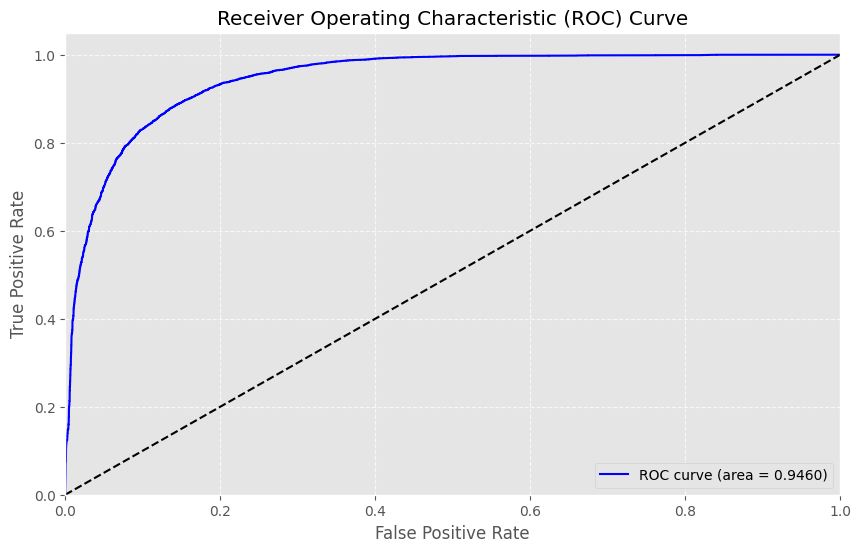

--------------------------------------------------------------------------------------------


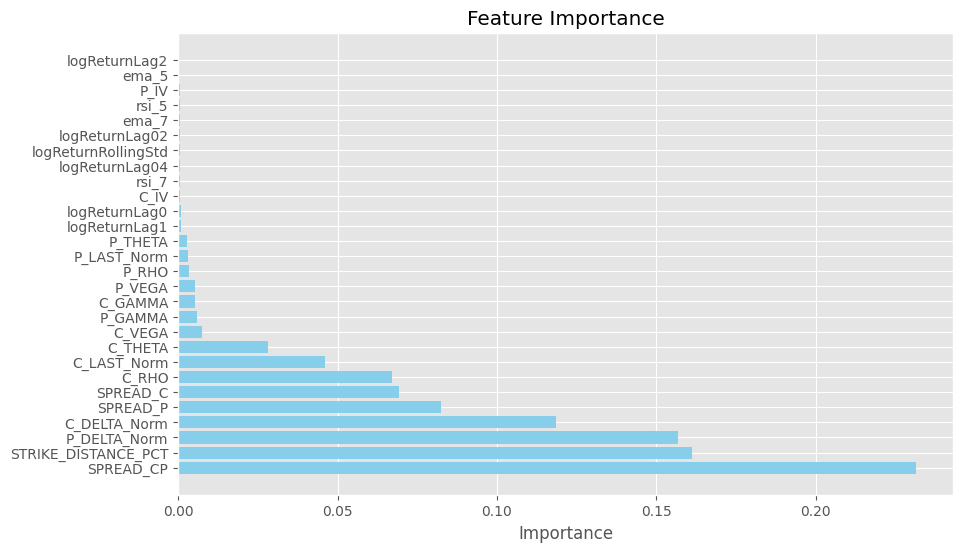

0

In [ ]:
ModelMetricesFCE(modelRF, X_train, X_test, y_train, y_test)

##XGBoost

XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm that builds an ensemble of decision trees using gradient boosting. It optimizes both model performance and computational efficiency, making it popular for structured data tasks. XGBoost combines the predictions of multiple trees to reduce bias and variance, and it uses regularization techniques to prevent overfitting. With its high performance, scalability, and flexibility, XGBoost is widely used in machine learning competitions and real-world applications for classification and regression problems.

In [ ]:
modelXGB = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    n_estimators=300,              # Increased number of trees
    learning_rate=0.01,            # Lower learning rate for better tuning
    max_depth=3,                   # Increase depth for more complex relationships
    subsample=0.8,                 # Subsample ratio of the training instances
    colsample_bytree=0.8,          # Subsample ratio of columns when constructing each tree
    gamma=0.1,                     # Minimum loss reduction required to make a further partition
    reg_alpha=0.1,                 # L1 regularization term on weights
    reg_lambda=1.0,                # L2 regularization term on weights
    random_state=42                 # Seed for reproducibility
)


evals = [(X_train, y_train), (X_test, y_test)]

modelXGB.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        #eval_metric='logloss',
        #early_stopping_rounds=100,
        verbose=True)

[0]	validation_0-logloss:0.67875	validation_1-logloss:0.68845
[1]	validation_0-logloss:0.67164	validation_1-logloss:0.68212
[2]	validation_0-logloss:0.66467	validation_1-logloss:0.67576
[3]	validation_0-logloss:0.65785	validation_1-logloss:0.66963
[4]	validation_0-logloss:0.65117	validation_1-logloss:0.66362
[5]	validation_0-logloss:0.64460	validation_1-logloss:0.65786
[6]	validation_0-logloss:0.63817	validation_1-logloss:0.65204
[7]	validation_0-logloss:0.63187	validation_1-logloss:0.64681
[8]	validation_0-logloss:0.62566	validation_1-logloss:0.64126
[9]	validation_0-logloss:0.61958	validation_1-logloss:0.63603
[10]	validation_0-logloss:0.61360	validation_1-logloss:0.63071
[11]	validation_0-logloss:0.60773	validation_1-logloss:0.62542
[12]	validation_0-logloss:0.60200	validation_1-logloss:0.62046
[13]	validation_0-logloss:0.59636	validation_1-logloss:0.61522
[14]	validation_0-logloss:0.59082	validation_1-logloss:0.61058
[15]	validation_0-logloss:0.58539	validation_1-logloss:0.60574
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Model Metrices
Accuracy Train: 0.9146
ROC AUC  Train: 0.9750
Accuracy  Test: 0.8720
ROC AUC   Test: 0.9490
--------------------------------------------------------------------------------------------


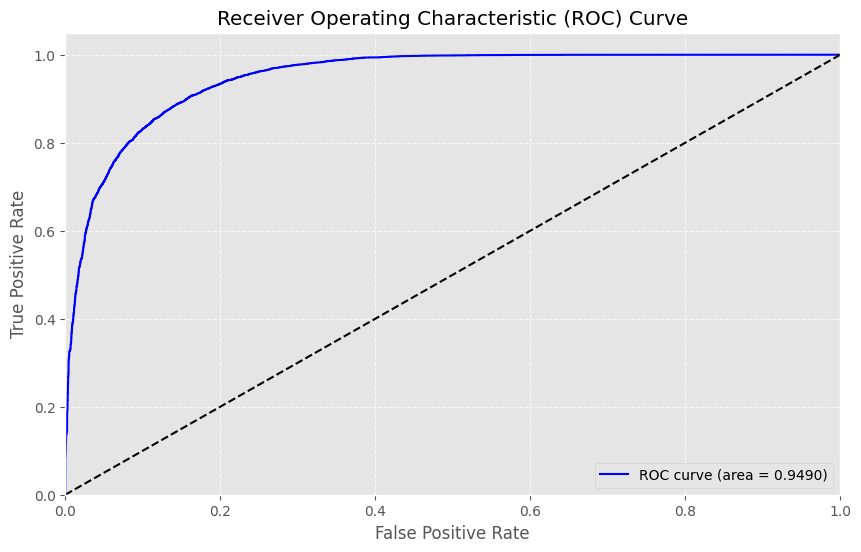

--------------------------------------------------------------------------------------------


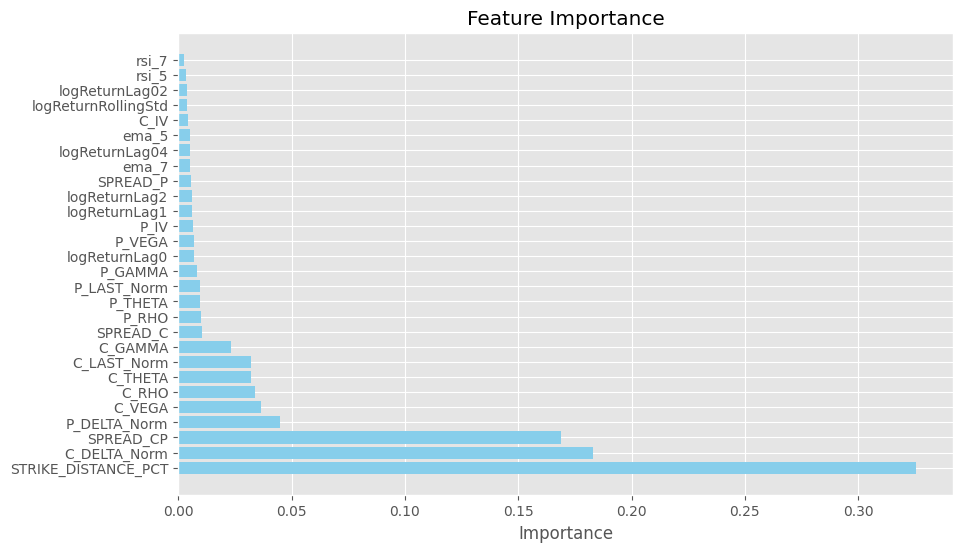

0

In [ ]:
ModelMetricesFCE(modelXGB, X_train, X_test, y_train, y_test)

## ML Probabilities

In [ ]:
y_pred = modelXGB.predict(X_test)
y_proba = modelXGB.predict_proba(X_test)[:, 1]

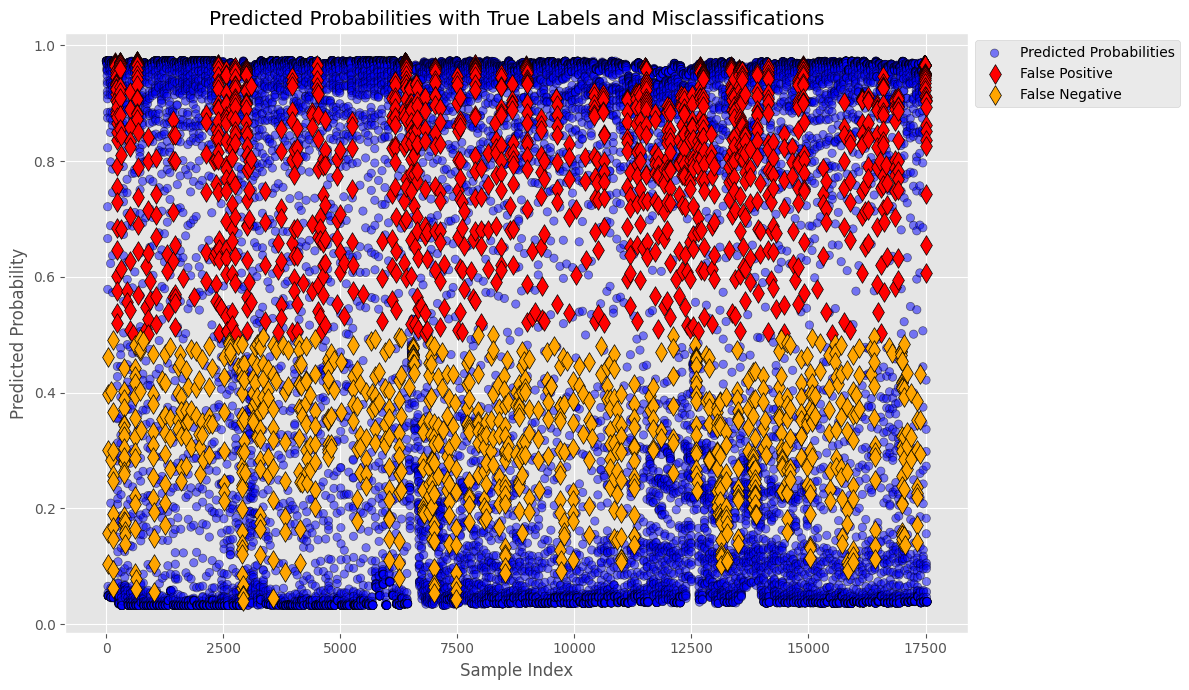

In [ ]:
# Create a scatter plot with an appropriate figure size
plt.figure(figsize=(12, 7))

# Color points based on true labels in y_test
colors = ['blue' if label == 0 else 'blue' for label in y_test]

# Plot probabilities with colors corresponding to true labels
plt.scatter(range(len(y_proba)), y_proba, c=colors, alpha=0.5, edgecolor='black', label='Predicted Probabilities')


# Calculate predicted labels using a single threshold of 0.5
y_pred = (y_proba >= 0.5).astype(int)

# Identify False Positives and False Negatives
fp_indices = np.where((y_test == 0) & (y_pred == 1))[0]  # False Positives
fn_indices = np.where((y_test == 1) & (y_pred == 0))[0]  # False Negatives

# Plot False Positives and False Negatives
plt.scatter(fp_indices, y_proba[fp_indices], marker='d', color='red', label='False Positive', s=100, edgecolor='black')
plt.scatter(fn_indices, y_proba[fn_indices], marker='d', color='orange', label='False Negative', s=100, edgecolor='black')

# Add plot details
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities with True Labels and Misclassifications')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
dataExtendedRes = pd.concat([train_data, test_data], ignore_index=True)

#06 Option Expectancy


Option expectancy refers to the expected value of an option's payoff, considering both the probability of the option finishing in-the-money and the magnitude of that payoff. In this code, the ExpectancyMLMod_FCE function computes the option expectancy by predicting the likelihood of an option expiring in-the-money using a machine learning model. The predicted probabilities (y_proba) are standardized by date to ensure consistency across different market conditions. The expectancy is then calculated by multiplying the predicted probability with the difference between the option’s bid price and the intrinsic value (strike price minus the closing price). This gives a weighted estimate of the option's expected payoff. The OptFcast_FCE function further identifies the option with the highest expectancy for each expiration date, which helps in selecting the most promising options for trading strategies.

In [ ]:
def ExpectancyMLMod_FCE(train_data, test_data, model, X_train, X_test):

  y_pred = model.predict(X_test)
  y_proba = model.predict_proba(X_test)[:, 1]

  test_data['y_pred'] = y_pred
  test_data['y_proba'] = y_proba


  y_pred = model.predict(X_train)
  y_proba = model.predict_proba(X_train)[:, 1]

  train_data['y_pred'] = y_pred
  train_data['y_proba'] = y_proba


  dataExtendedRes = pd.concat([train_data, test_data], ignore_index=True)


  def standardize_proba_by_date(group):
    group['y_proba'] = (group['y_proba'] - group['y_proba'].min()) / (group['y_proba'].max() - group['y_proba'].min())
    return group

  dataExtendedRes = dataExtendedRes.groupby('QUOTE_DATE').apply(standardize_proba_by_date)


  dataExtendedRes['Expect'] = (dataExtendedRes['y_proba'])* (dataExtendedRes['C_BID'] - (dataExtendedRes['Close'] - dataExtendedRes['STRIKE']))

  return dataExtendedRes.copy()


def OptFcast_FCE(dataExtendedRes, EColName):

  dataExtendedRes['OptFcast'] = 0
  # Group by date and find the row with the highest EPay for each date

  for date, group in dataExtendedRes.groupby('EXPIRE_UNIX'):
    # Check if EPay has valid numeric data before trying to find the maximum
    if group[EColName].notna().any() and pd.api.types.is_numeric_dtype(group[EColName]):
      row_with_highest_epay = group.loc[group[EColName].idxmax()]
      dataExtendedRes.loc[row_with_highest_epay.name, 'OptFcast'] = 1
    else:
      print(f"Warning: Skipping group for date {date} due to invalid Expect data.")


  return dataExtendedRes.copy()

In [ ]:
def OptFcastEC_FCE(dataExtendedRes, garchName):

  dataExtendedRes['OptFcast'] = 0

  dataExtendedRes['gDistance'] = 999

  dataExtendedRes['Garch'] = dataExtendedRes[garchName]/100
  dataExtendedRes['gDistance'] = (dataExtendedRes['Close'] * (np.exp(dataExtendedRes['Garch'])) - dataExtendedRes['STRIKE'])**2
  dataExtendedRes['PredClose'] = dataExtendedRes['Close'] * (np.exp(dataExtendedRes['Garch']))

  for date, group in dataExtendedRes.groupby('EXPIRE_UNIX'):
    # Check if EPay has valid numeric data before trying to find the maximum
    if group['gDistance'].notna().any() and pd.api.types.is_numeric_dtype(group['gDistance']):
      row_with_highest_epay = group.loc[group['gDistance'].idxmin()]
      dataExtendedRes.loc[row_with_highest_epay.name, 'OptFcast'] = 1
    else:
      print(f"Warning: Skipping group for date {date} due to invalid Expect data.")


  #del dataExtendedRes

  return dataExtendedRes.copy()

###Expectancy

In [ ]:
dfRF = ExpectancyMLMod_FCE(train_data, test_data, modelRF, X_train, X_test)
dfRF = OptFcast_FCE(dfRF, 'Expect')

dfXGB = ExpectancyMLMod_FCE(train_data, test_data, modelXGB, X_train, X_test)
dfXGB = OptFcast_FCE(dfXGB, 'Expect')


dataExtendedRes2 = pd.concat([train_data, test_data], ignore_index=True)

dataExtendedRes3 = dataExtendedRes2.copy()

dfGARCH11_1 = OptFcastEC_FCE(dataExtendedRes2, 'GARCH11_1')
dfGARCH11_5 = OptFcastEC_FCE(dataExtendedRes2, 'GARCH11_5')
dfGARCH11_20 = OptFcastEC_FCE(dataExtendedRes2, 'GARCH11_20')

In [ ]:
dfXGB

QUOTE_UNIXTIME  QUOTE_READTIME QUOTE_DATE  QUOTE_TIME_HOURS  \
QUOTE_DATE                                                                      
2010-12-31 0          1293829200             0.0 2010-12-31              16.0   
           1          1293829200             0.0 2010-12-31              16.0   
           2          1293829200             0.0 2010-12-31              16.0   
           3          1293829200             0.0 2010-12-31              16.0   
           4          1293829200             0.0 2010-12-31              16.0   
...                          ...             ...        ...               ...   
2023-12-29 31098      1703883600             0.0 2023-12-29              16.0   
           31099      1703883600             0.0 2023-12-29              16.0   
           31100      1703883600             0.0 2023-12-29              16.0   
           31101      1703883600             0.0 2023-12-29              16.0   
           31102      1703883600             0.0 2023-12-29              16.0   

                   Close  EXPIRE_DATE  EXPIRE_UNIX  DTE  C_DELTA  C_GAMMA  \
QUOTE_DATE                                                                  
2010-12-31 0      125.78          0.0   1294434000  7.0  1.00000  0.00000   
           1      125.78          0.0   1294434000  7.0  0.99137  0.00674   
           2      125.78          0.0   1294434000  7.0  0.99451  0.00572   
           3      125.78          0.0   1294434000  7.0  0.97761  0.01802   
           4      125.78          0.0   1294434000  7.0  0.94681  0.03575   
...                  ...          ...          ...  ...      ...      ...   
2023-12-29 31098  475.31          0.0   1704488400  7.0  0.00572  0.00193   
           31099  475.31          0.0   1704488400  7.0  0.00232  0.00096   
           31100  475.31          0.0   1704488400  7.0  0.00183  0.00081   
           31101  475.31          0.0   1704488400  7.0  0.00243  0.00075   
           31102  475.31          0.0   1704488400  7.0  0.00211  0.00054   

                  ...     roc_7     roc_15  GARCH11_1  GARCH11_5  GARCH11_20  \
QUOTE_DATE        ...                                                          
2010-12-31 0      ...  4.650969  11.824324   4.482874   2.678791    1.039995   
           1      ...  4.650969  11.824324   4.482874   2.678791    1.039995   
           2      ...  4.650969  11.824324   4.482874   2.678791    1.039995   
           3      ...  4.650969  11.824324   4.482874   2.678791    1.039995   
           4      ...  4.650969  11.824324   4.482874   2.678791    1.039995   
...               ...       ...        ...        ...        ...         ...   
2023-12-29 31098  ...  7.850968   7.208752   4.427376   2.644392    1.024763   
           31099  ...  7.850968   7.208752   4.427376   2.644392    1.024763   
           31100  ...  7.850968   7.208752   4.427376   2.644392    1.024763   
           31101  ...  7.850968   7.208752   4.427376   2.644392    1.024763   
           31102  ...  7.850968   7.208752   4.427376   2.644392    1.024763   

                  ITM  y_pred   y_proba    Expect  OptFcast  
QUOTE_DATE                                                   
2010-12-31 0        1       1  1.000000 -0.090000         0  
           1        1       1  1.000000 -0.080000         0  
           2        1       1  1.000000 -0.060000         0  
           3        1       1  0.999891 -0.029997         0  
           4        1       1  0.991347  0.009913         0  
...               ...     ...       ...       ...       ...  
2023-12-29 31098    0       0  0.001386  0.030082         0  
           31099    0       0  0.001386  0.031454         0  
           31100    0       0  0.001386  0.032841         0  
           31101    0       0  0.001386  0.034227         0  
           31102    0       0  0.001386  0.041158         0  

[31103 rows x 70 columns]

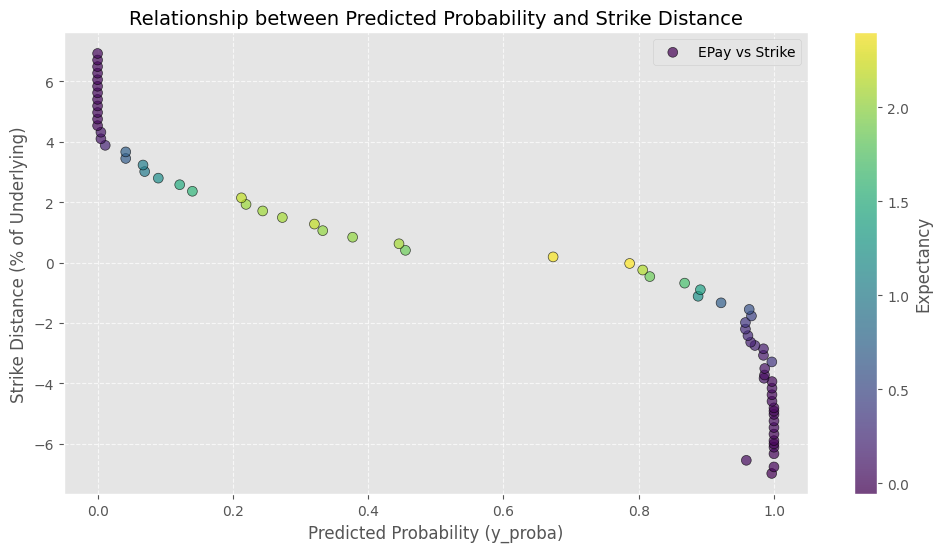

In [ ]:
x = dfRF[dfRF['QUOTE_DATE'] == '2023-12-08'][['QUOTE_DATE', 'Close', 'C_LAST', 'P_LAST', 'STRIKE', 'STRIKE_DISTANCE_PCT', 'ITM', 'y_pred', 'y_proba', 'Expect']]


plt.figure(figsize=(12, 6))

# Scatter plot with customizations
plt.scatter(x['y_proba'], x['STRIKE_DISTANCE_PCT']*100,
            label='EPay vs Strike',
            s=50,  # Adjust marker size
            c=x['Expect'],  # Color points based on Expect values
            cmap='viridis',  # Choose a colormap
            alpha=0.7,  # Adjust transparency
            edgecolors='black'  # Add black edges to markers
           )

plt.xlabel('Predicted Probability (y_proba)', fontsize=12)  # Improved label
plt.ylabel('Strike Distance (% of Underlying)', fontsize=12)  # Improved label
plt.title('Relationship between Predicted Probability and Strike Distance', fontsize=14)  # Improved title
plt.colorbar(label='Expectancy')  # Add colorbar for Expect values
plt.legend(loc='best', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)  # Customize grid

plt.show()

The more yellow, the better.

In [ ]:
dfRF2 = dfXGB.copy()

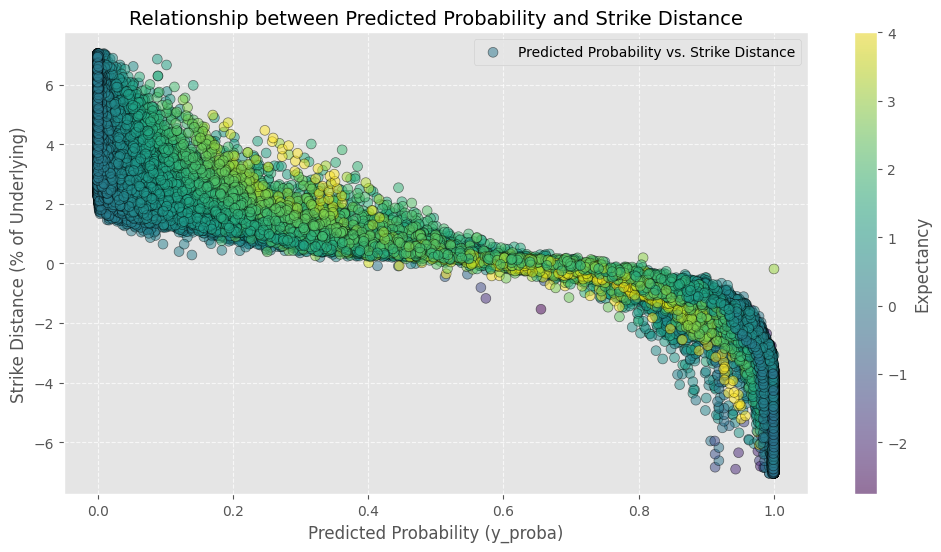

In [ ]:
dfRF2['Expect'] = dfRF2['Expect'].clip(upper=4)

plt.figure(figsize=(12, 6))

# Scatter plot with customizations
plt.scatter(dfRF2['y_proba'], dfRF2['STRIKE_DISTANCE_PCT']*100,
            label='Predicted Probability vs. Strike Distance',  # More descriptive label
            s=50,  # Adjust marker size
            c=dfRF2['Expect'],  # Color points based on Expect values
            cmap='viridis',  # Choose a colormap
            alpha=0.5,  # Adjust transparency
            edgecolors='black'  # Add black edges to markers
           )

plt.xlabel('Predicted Probability (y_proba)', fontsize=12)  # Improved label
plt.ylabel('Strike Distance (% of Underlying)', fontsize=12)  # Improved label
plt.title('Relationship between Predicted Probability and Strike Distance', fontsize=14)  # Improved title
plt.colorbar(label='Expectancy')  # Add colorbar for Expect values
plt.legend(loc='best', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)  # Customize grid

plt.show()

#07 Backtesting Strategy

In [ ]:
dfGARCH11_1

QUOTE_UNIXTIME  QUOTE_READTIME QUOTE_DATE  QUOTE_TIME_HOURS   Close  \
0          1293829200             0.0 2010-12-31              16.0  125.78   
1          1293829200             0.0 2010-12-31              16.0  125.78   
2          1293829200             0.0 2010-12-31              16.0  125.78   
3          1293829200             0.0 2010-12-31              16.0  125.78   
4          1293829200             0.0 2010-12-31              16.0  125.78   
...               ...             ...        ...               ...     ...   
31098      1703883600             0.0 2023-12-29              16.0  475.31   
31099      1703883600             0.0 2023-12-29              16.0  475.31   
31100      1703883600             0.0 2023-12-29              16.0  475.31   
31101      1703883600             0.0 2023-12-29              16.0  475.31   
31102      1703883600             0.0 2023-12-29              16.0  475.31   

       EXPIRE_DATE  EXPIRE_UNIX  DTE  C_DELTA  C_GAMMA  ...  GARCH11_1  \
0              0.0   1294434000  7.0  1.00000  0.00000  ...   4.482874   
1              0.0   1294434000  7.0  0.99137  0.00674  ...   4.482874   
2              0.0   1294434000  7.0  0.99451  0.00572  ...   4.482874   
3              0.0   1294434000  7.0  0.97761  0.01802  ...   4.482874   
4              0.0   1294434000  7.0  0.94681  0.03575  ...   4.482874   
...            ...          ...  ...      ...      ...  ...        ...   
31098          0.0   1704488400  7.0  0.00572  0.00193  ...   4.427376   
31099          0.0   1704488400  7.0  0.00232  0.00096  ...   4.427376   
31100          0.0   1704488400  7.0  0.00183  0.00081  ...   4.427376   
31101          0.0   1704488400  7.0  0.00243  0.00075  ...   4.427376   
31102          0.0   1704488400  7.0  0.00211  0.00054  ...   4.427376   

       GARCH11_5  GARCH11_20  ITM  y_pred   y_proba  OptFcast   gDistance  \
0       2.678791    1.039995    1       1  0.973906         0  211.610945   
1       2.678791    1.039995    1       1  0.973906         0  183.517238   
2       2.678791    1.039995    1       1  0.973906         0  157.423531   
3       2.678791    1.039995    1       1  0.973803         0  133.329825   
4       2.678791    1.039995    1       1  0.965752         0  111.236118   
...          ...         ...  ...     ...       ...       ...         ...   
31098   2.644392    1.024763    0       0  0.038526         1    0.030083   
31099   2.644392    1.024763    0       0  0.038526         0    1.376972   
31100   2.644392    1.024763    0       0  0.038526         0    4.723861   
31101   2.644392    1.024763    0       0  0.038526         0   10.070750   
31102   2.644392    1.024763    0       0  0.038526         0   66.805195   

          Garch   PredClose  
0      0.044829  131.546853  
1      0.044829  131.546853  
2      0.044829  131.546853  
3      0.044829  131.546853  
4      0.044829  131.546853  
...         ...         ...  
31098  0.044274  496.826556  
31099  0.044274  496.826556  
31100  0.044274  496.826556  
31101  0.044274  496.826556  
31102  0.044274  496.826556  

[31103 rows x 72 columns]

Use onlz rows where 'OptFcast' == 1, use only rows which maximalizes expected value

In [ ]:
dfXGB = dfXGB[dfXGB['OptFcast'] == 1]
dfRF = dfRF[dfRF['OptFcast'] == 1]

dfGARCH11_1 = dfGARCH11_1[dfGARCH11_1['OptFcast'] == 1]
dfGARCH11_5 = dfGARCH11_5[dfGARCH11_5['OptFcast'] == 1]
dfGARCH11_20 = dfGARCH11_20[dfGARCH11_20['OptFcast'] == 1]

In [ ]:
def Backtester_FCE(df, trainTestSplit):

  df['ITMReal'] = (df['STRIKE'] < df["priceTarget"]).astype(int)

  df['Profit'] = df['priceTarget'] - df['Close'] \
                      + df['C_BID'] \
                      - df['ITMReal'] * (df["priceTarget"] - df["STRIKE"])



  df['StrategyLogRet'] = np.log((df['Profit']+df['Close'])/df['Close'])

  df['StrategyLogRet'] = df['StrategyLogRet']*100
  df['StrategyLogRetCumsum'] = df['StrategyLogRet'].cumsum()


  df['StrategyRet'] = ((df['Profit']+df['Close'])/df['Close'])-1
  df['StrategyRet'] = df['StrategyRet'] *100


  df['IndexLogRet'] = np.log(df['priceTarget']/df['Close'])
  df['IndexLogRet'] = df['IndexLogRet'] *100
  df['IndexLogRetCumsum'] = df['IndexLogRet'].cumsum()


  df['IndexRet'] = ((df['priceTarget'])/df['Close'])-1
  df['IndexRet'] = df['IndexRet'] *100



  df['StrategyRolVolAnl'] = df['StrategyLogRet'].rolling(window=20).std() * np.sqrt(52)
  df['IndexRolVolAnl'] = df['IndexLogRet'].rolling(window=20).std() * np.sqrt(52)


  df['StrategyRolVol'] = df['StrategyLogRet'].rolling(window=20).std()
  df['IndexRolVol'] = df['IndexLogRet'].rolling(window=20).std()


  rolling_mean = df['StrategyLogRet'].rolling(20).mean() * 52  # Annualized mean
  rolling_std = df['StrategyLogRet'].rolling(20).std() * np.sqrt(52)  # Annualized std
  rolling_sharpe = (rolling_mean - 0.02) / rolling_std

  df['StrategyRolSharpRatio'] = rolling_sharpe

  rolling_mean = df['IndexLogRet'].rolling(20).mean() * 52  # Annualized mean
  rolling_std = df['IndexLogRet'].rolling(20).std() * np.sqrt(52)  # Annualized std
  rolling_sharpe = (rolling_mean - 0.02) / rolling_std

  df['IndexRolSharpRatio'] = rolling_sharpe




  dfTrain = df[df['QUOTE_DATE'] < trainTestSplit].copy()
  dfTest = df[df['QUOTE_DATE'] >= trainTestSplit].copy()





  dfTrain['StrategyLogRetCumsum'] = dfTrain['StrategyLogRet'].cumsum()
  dfTrain['IndexLogRetCumsum'] = dfTrain['IndexLogRet'].cumsum()

  dfTest['StrategyLogRetCumsum'] = dfTest['StrategyLogRet'].cumsum()
  dfTest['IndexLogRetCumsum'] = dfTest['IndexLogRet'].cumsum()



  dfTrain.set_index('QUOTE_DATE', inplace=True)
  dfTest.set_index('QUOTE_DATE', inplace=True)

  dfTrain = dfTrain.replace([np.inf, -np.inf], np.nan).fillna(0)
  dfTest = dfTest.replace([np.inf, -np.inf], np.nan).fillna(0)


  dfTrain = dfTrain[dfTrain.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
  dfTest = dfTest[dfTest.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

  dfTest = dfTest.iloc[:-1]

  return dfTrain, dfTest

In [ ]:
# Backtest for ML models
dfRF_Train, dfRF_Test = Backtester_FCE(dfRF, trainTestSplit)
dfXGB_Train, dfXGB_Test = Backtester_FCE(dfXGB, trainTestSplit)

# Backtest for GARCH models
dfGARCH11_1_Train, dfGARCH11_1_Test = Backtester_FCE(dfGARCH11_1, trainTestSplit)
dfGARCH11_5_Train, dfGARCH11_5_Test = Backtester_FCE(dfGARCH11_5, trainTestSplit)
dfGARCH11_20_Train, dfGARCH11_20_Test = Backtester_FCE(dfGARCH11_20, trainTestSplit)

In [ ]:
# List of your DataFrames
dfs = [ dfRF_Test,  dfXGB_Test,
        dfGARCH11_1_Test,
       dfGARCH11_5_Test, dfGARCH11_20_Test]

# Loop through each DataFrame and drop the last row
for i in range(len(dfs)):
    dfs[i] = dfs[i].iloc[:-1]  # Drop the last row using iloc

In [ ]:
dfRF_Test

QUOTE_UNIXTIME  QUOTE_READTIME  QUOTE_TIME_HOURS   Close  \
QUOTE_DATE                                                             
2018-01-05      1515186000             0.0              16.0  273.41   
2018-01-12      1515790800             0.0              16.0  277.91   
2018-01-19      1516395600             0.0              16.0  280.41   
2018-01-26      1517000400             0.0              16.0  286.56   
2018-02-02      1517605200             0.0              16.0  275.52   
...                    ...             ...               ...     ...   
2023-11-24      1700859600             0.0              16.0  455.30   
2023-12-01      1701464400             0.0              16.0  459.02   
2023-12-08      1702069200             0.0              16.0  460.14   
2023-12-15      1702674000             0.0              16.0  469.41   
2023-12-22      1703278800             0.0              16.0  473.68   

            EXPIRE_DATE  EXPIRE_UNIX  DTE  C_DELTA  C_GAMMA   C_VEGA  ...  \
QUOTE_DATE                                                            ...   
2018-01-05          0.0   1515790800  7.0  0.14703  0.09331  0.09329  ...   
2018-01-12          0.0   1516395600  7.0  0.13007  0.07788  0.08710  ...   
2018-01-19          0.0   1517000400  7.0  0.30927  0.10489  0.14634  ...   
2018-01-26          0.0   1517605200  7.0  0.14109  0.06190  0.09463  ...   
2018-02-02          0.0   1518210000  7.0  0.32722  0.06253  0.14680  ...   
...                 ...          ...  ...      ...      ...      ...  ...   
2023-11-24          0.0   1701464400  7.0  0.48619  0.07816  0.26418  ...   
2023-12-01          0.0   1702069200  7.0  0.47557  0.06050  0.26591  ...   
2023-12-08          0.0   1702674000  7.0  0.47762  0.04709  0.26452  ...   
2023-12-15          0.0   1703278800  7.0  0.49985  0.06153  0.27221  ...   
2023-12-22          0.0   1703883600  7.0  0.49045  0.05484  0.27419  ...   

            StrategyRet  IndexLogRet  IndexLogRetCumsum  IndexRet  \
QUOTE_DATE                                                          
2018-01-05     1.013130     1.632482           1.632482  1.645880   
2018-01-12     0.964341     0.895550           2.528032  0.899572   
2018-01-19     0.805963     2.169512           4.697544  2.193217   
2018-01-26    -1.193467    -1.288981           3.408563 -1.280709   
2018-02-02    -4.576800    -5.146141          -1.737578 -5.015970   
...                 ...          ...                ...       ...   
2023-11-24     0.577641     0.813724          16.351207  0.817044   
2023-12-01     0.736351     0.243701          16.594908  0.243998   
2023-12-08     0.662842     1.994580          18.589488  2.014604   
2023-12-15     0.671055     0.905540          19.495028  0.909653   
2023-12-22     0.652339     0.343523          19.838551  0.344114   

            StrategyRolVolAnl  IndexRolVolAnl  StrategyRolVol  IndexRolVol  \
QUOTE_DATE                                                                   
2018-01-05           2.594496        5.209600        0.359792     0.722442   
2018-01-12           2.566861        5.219571        0.355960     0.723824   
2018-01-19           2.615294        5.649980        0.362676     0.783511   
2018-01-26           3.471828        6.213621        0.481456     0.861674   
2018-02-02           8.949001       11.235567        1.241003     1.558093   
...                       ...             ...             ...          ...   
2023-11-24           8.626179       15.350855        1.196236     2.128781   
2023-12-01           8.632792       14.870547        1.197153     2.062174   
2023-12-08           8.590736       15.173378        1.191321     2.104169   
2023-12-15           8.564576       15.153563        1.187693     2.101421   
2023-12-22           7.928108       14.624399        1.099431     2.028039   

            StrategyRolSharpRatio  IndexRolSharpRatio  
QUOTE_DATE                                             
2018-01-05               9.910322            6.8

##Returns

Train

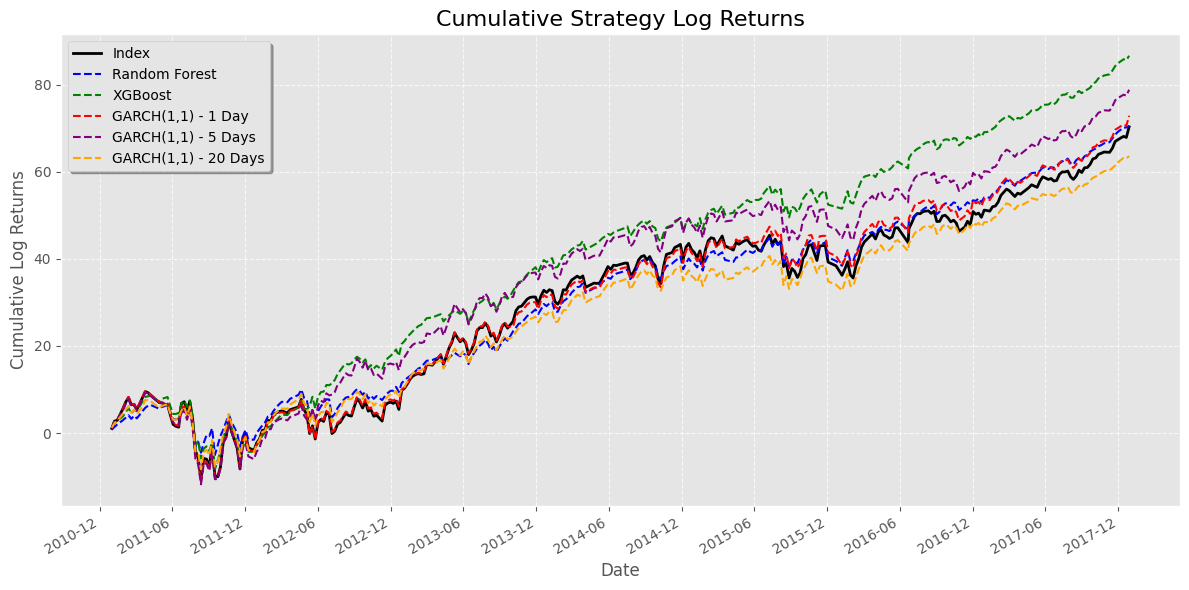

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Import for date formatting

# List of your DataFrames
dfs = [dfRF_Train, dfXGB_Train, dfGARCH11_1_Train, dfGARCH11_5_Train, dfGARCH11_20_Train]

# List of DataFrame names for the legend
df_names = ['Random Forest', 'XGBoost', 'GARCH(1,1) - 1 Day', 'GARCH(1,1) - 5 Days', 'GARCH(1,1) - 20 Days']

# Create the plot
plt.figure(figsize=(12, 6))  # Increased figure size for better readability

# Plot Index cumulative sum with a thicker line and distinct color
plt.plot(dfRF_Train['IndexLogRetCumsum'], label='Index', color='black', linewidth=2)

# Plot cumulative sum for each DataFrame with distinct colors and styles
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Define colors for each strategy
linestyles = ['--', '--', '--', '--', '--']  # Define linestyles for each strategy

for df, name, color, linestyle in zip(dfs, df_names, colors, linestyles):
    plt.plot(df['StrategyLogRetCumsum'], label=name, color=color, linestyle=linestyle)

# Add plot details
plt.title('Cumulative Strategy Log Returns', fontsize=16)  # Increased title font size
plt.xlabel('Date', fontsize=12)  # Increased x-axis label font size
plt.ylabel('Cumulative Log Returns', fontsize=12)  # Increased y-axis label font size

# Format x-axis dates for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format dates as 'YYYY-MM'
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show ticks every 3 months
plt.gcf().autofmt_xdate()  # Rotate x-axis labels for better readability

# Improve legend appearance
plt.legend(loc='upper left', fontsize=10, frameon=True, shadow=True)  # Added frame and shadow

plt.grid(True, linestyle='--', alpha=0.7)  # Added grid with dashed lines and transparency

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

Test

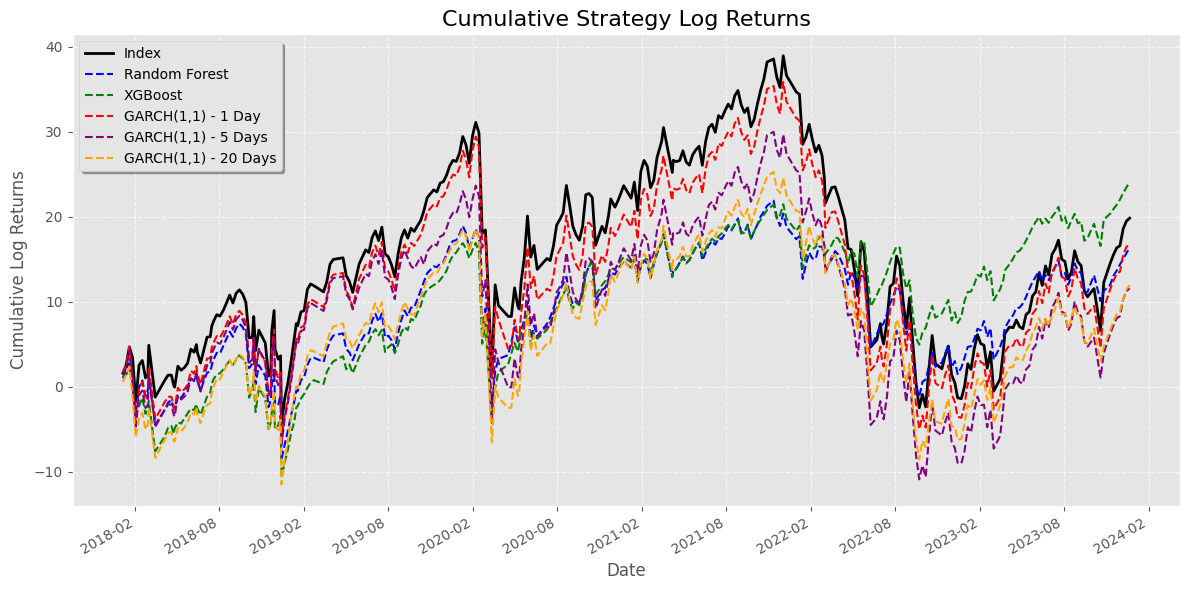

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Import for date formatting

# List of your DataFrames
dfs = [dfRF_Test, dfXGB_Test,
       dfGARCH11_1_Test,  dfGARCH11_5_Test,
        dfGARCH11_20_Test, ]

# List of DataFrame names for the legend
df_names = ['Random Forest', 'XGBoost', 'GARCH(1,1) - 1 Day', 'GARCH(1,1) - 5 Days', 'GARCH(1,1) - 20 Days']

# Create the plot
plt.figure(figsize=(12, 6))  # Increased figure size for better readability

# Plot Index cumulative sum with a thicker line and distinct color
plt.plot(dfRF_Test['IndexLogRetCumsum'], label='Index', color='black', linewidth=2)

# Plot cumulative sum for each DataFrame with distinct colors and styles
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Define colors for each strategy
linestyles = ['--', '--', '--', '--', '--']  # Define linestyles for each strategy

for df, name, color, linestyle in zip(dfs, df_names, colors, linestyles):
    plt.plot(df['StrategyLogRetCumsum'], label=name, color=color, linestyle=linestyle)

# Add plot details
plt.title('Cumulative Strategy Log Returns', fontsize=16)  # Increased title font size
plt.xlabel('Date', fontsize=12)  # Increased x-axis label font size
plt.ylabel('Cumulative Log Returns', fontsize=12)  # Increased y-axis label font size

# Format x-axis dates for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format dates as 'YYYY-MM'
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show ticks every 3 months
plt.gcf().autofmt_xdate()  # Rotate x-axis labels for better readability

# Improve legend appearance
plt.legend(loc='upper left', fontsize=10, frameon=True, shadow=True)  # Added frame and shadow

plt.grid(True, linestyle='--', alpha=0.7)  # Added grid with dashed lines and transparency

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

## Rolling Volatility

Train

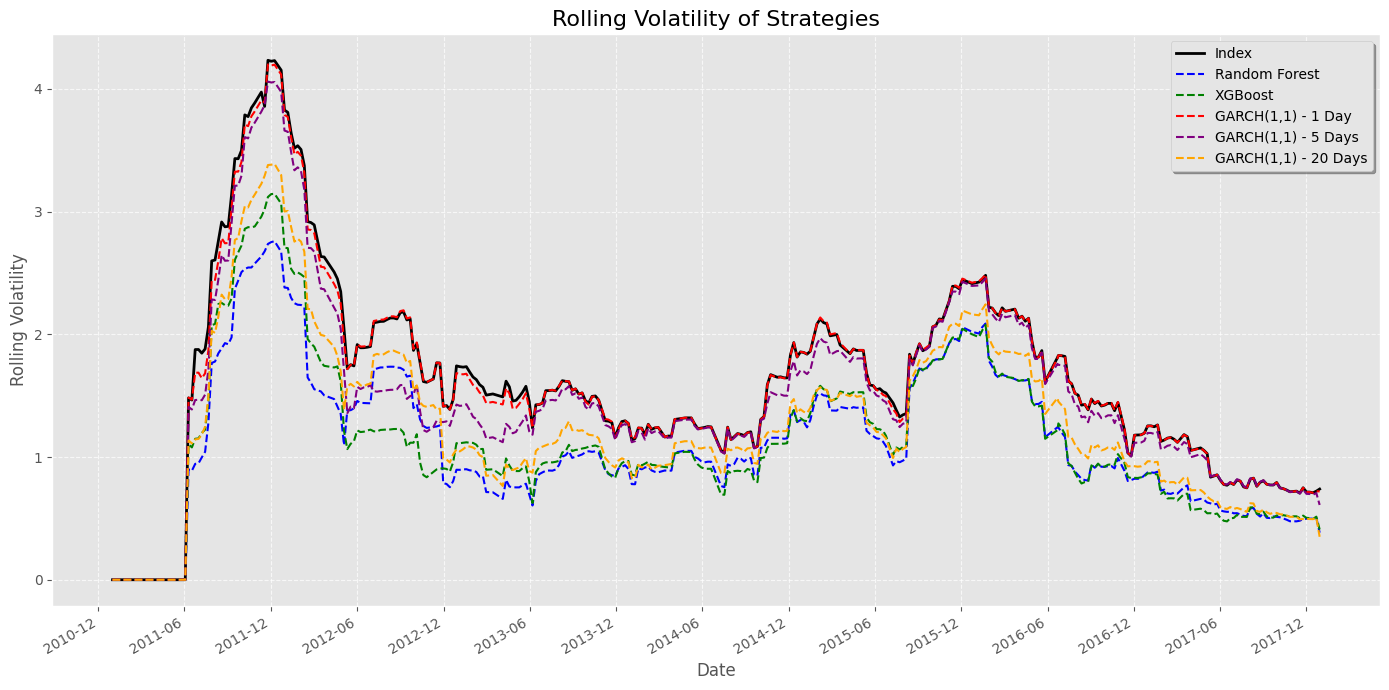

In [ ]:
# List of your DataFrames
dfs = [dfRF_Train, dfXGB_Train, dfGARCH11_1_Train, dfGARCH11_5_Train, dfGARCH11_20_Train]

# List of DataFrame names for the legend - More descriptive names
df_names = ['Random Forest', 'XGBoost', 'GARCH(1,1) - 1 Day', 'GARCH(1,1) - 5 Days', 'GARCH(1,1) - 20 Days']

# Create the plot with increased size
plt.figure(figsize=(14, 7))

# Plot Index Rolling Volatility with distinct style
plt.plot(dfRF_Train['IndexRolVol'], label='Index', color='black', linewidth=2, linestyle='-')

# Plot Strategy Rolling Volatility with distinct colors and styles
colors = ['blue', 'green', 'red', 'purple', 'orange']
linestyles = ['--', '--',  '--', '--', '--']

for df, name, color, linestyle in zip(dfs, df_names, colors, linestyles):
    plt.plot(df['StrategyRolVol'], label=name, color=color, linestyle=linestyle)

# Add plot details with adjusted font sizes
plt.title('Rolling Volatility of Strategies', fontsize=16)  # Changed title for clarity
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Volatility', fontsize=12)  # Changed y-axis label for clarity

# Format x-axis dates for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gcf().autofmt_xdate()

# Improve legend appearance
plt.legend(loc='upper right', fontsize=10, frameon=True, shadow=True)

# Add a grid with styling
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot with tight layout
plt.tight_layout()
plt.show()

Test

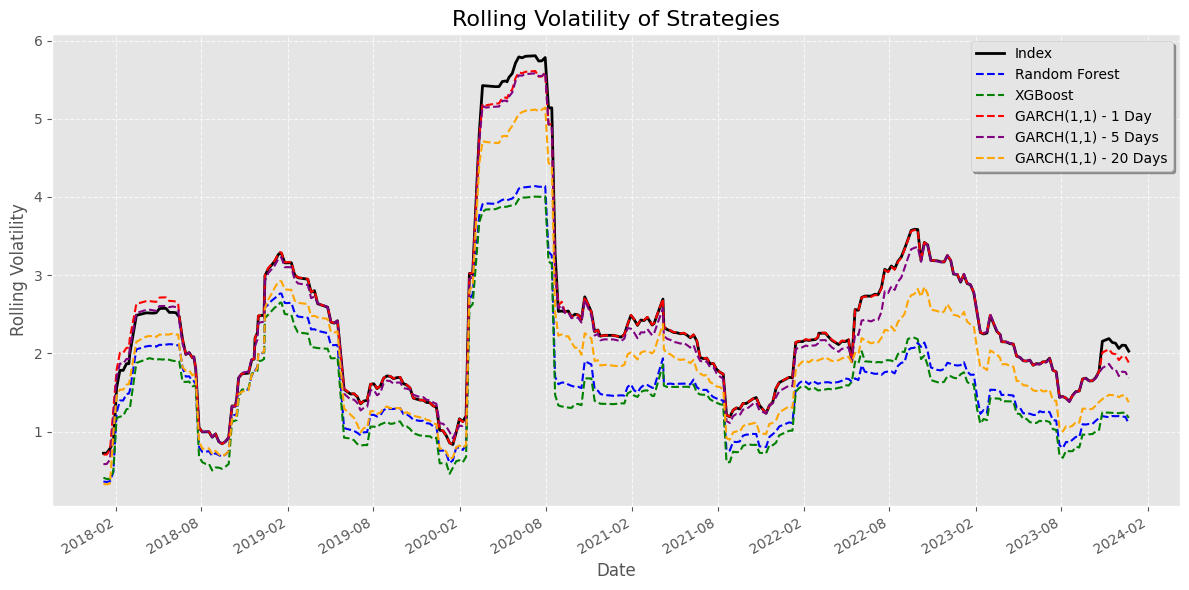

In [ ]:
# List of your DataFrames
# List of your DataFrames
dfs = [dfRF_Test, dfXGB_Test,
       dfGARCH11_1_Test,  dfGARCH11_5_Test,
        dfGARCH11_20_Test, ]

# List of DataFrame names for the legend - More descriptive names
df_names = ['Random Forest', 'XGBoost', 'GARCH(1,1) - 1 Day', 'GARCH(1,1) - 5 Days', 'GARCH(1,1) - 20 Days']

# Create the plot with increased size
plt.figure(figsize=(12, 6))

# Plot Index Rolling Volatility with distinct style
plt.plot(dfRF_Test['IndexRolVol'], label='Index', color='black', linewidth=2, linestyle='-')

# Plot Strategy Rolling Volatility with distinct colors and styles
colors = ['blue', 'green', 'red', 'purple', 'orange']
linestyles = ['--', '--',  '--', '--', '--']

for df, name, color, linestyle in zip(dfs, df_names, colors, linestyles):
    plt.plot(df['StrategyRolVol'], label=name, color=color, linestyle=linestyle)

# Add plot details with adjusted font sizes
plt.title('Rolling Volatility of Strategies', fontsize=16)  # Changed title for clarity
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Volatility', fontsize=12)  # Changed y-axis label for clarity

# Format x-axis dates for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gcf().autofmt_xdate()

# Improve legend appearance
plt.legend(loc='upper right', fontsize=10, frameon=True, shadow=True)

# Add a grid with styling
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot with tight layout
plt.tight_layout()
plt.show()

##Rolling SharpRatio

Train

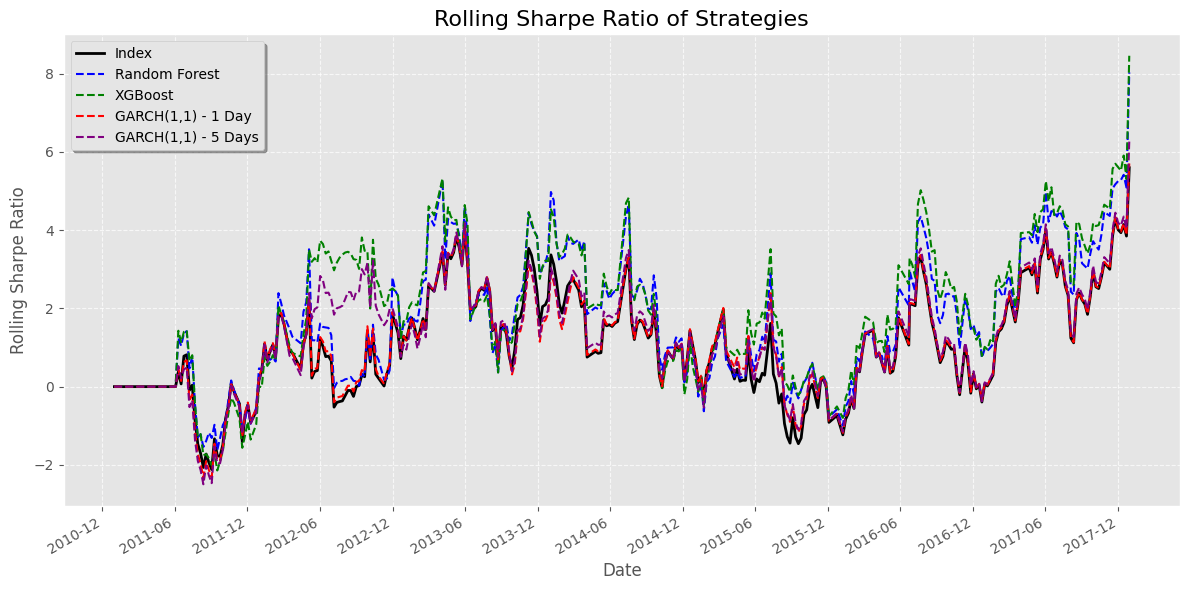

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# List of your DataFrames
dfs = [dfRF_Train, dfXGB_Train, dfGARCH11_1_Train, dfGARCH11_5_Train, dfGARCH11_20_Train]

# List of DataFrame names for the legend - More descriptive names
df_names = ['Random Forest', 'XGBoost', 'GARCH(1,1) - 1 Day', 'GARCH(1,1) - 5 Days', 'GARCH(1,1) - 20 Days']

# Create the plot with increased size
plt.figure(figsize=(12, 6))

# Plot Index Rolling Sharpe Ratio with distinct style
plt.plot(dfRF_Train['IndexRolSharpRatio'], label='Index', color='black', linewidth=2, linestyle='-')

# Plot Strategy Rolling Sharpe Ratios with distinct colors and styles
colors = ['blue', 'green', 'red', 'purple', 'orange']
linestyles = ['--', '--','--','--']  # Varied linestyles

for df, name, color, linestyle in zip(dfs, df_names, colors, linestyles):
    plt.plot(df['StrategyRolSharpRatio'], label=name, color=color, linestyle=linestyle)

# Add plot details with adjusted font sizes and title
plt.title('Rolling Sharpe Ratio of Strategies', fontsize=16)  # More descriptive title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Sharpe Ratio', fontsize=12)  # More accurate y-axis label

# Format x-axis dates for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show ticks every 3 months
plt.gcf().autofmt_xdate()  # Rotate x-axis labels

# Improve legend appearance
plt.legend(loc='upper left', fontsize=10, frameon=True, shadow=True)

# Add a grid with styling
plt.grid(True, linestyle='--', alpha=0.7)  # Dashed grid with transparency

# Show the plot with tight layout
plt.tight_layout()
plt.show()

Test

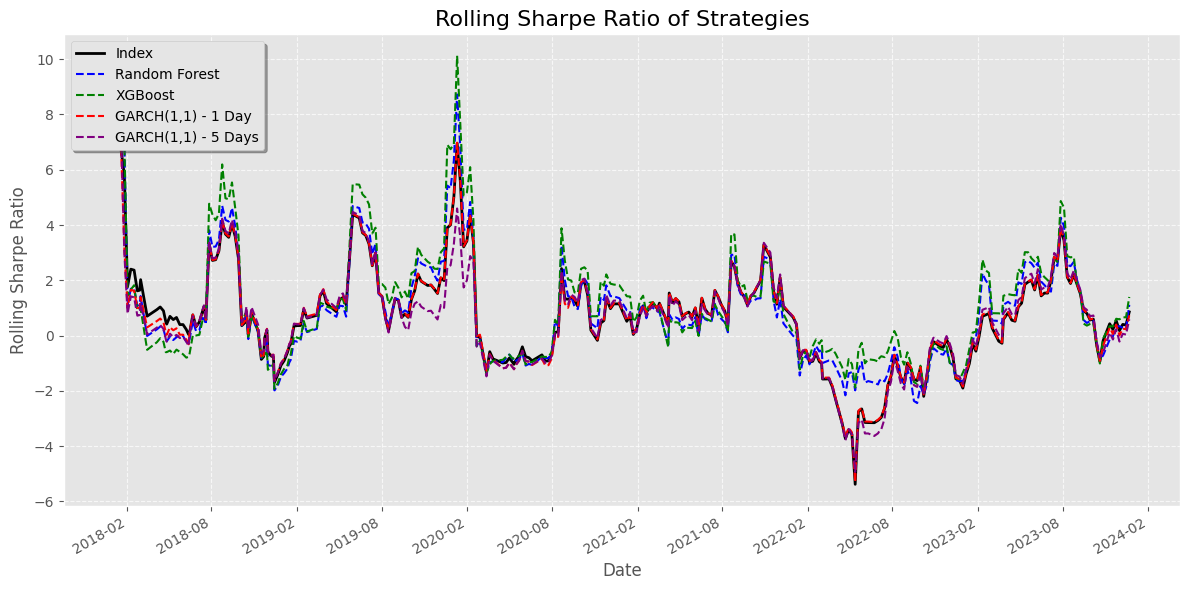

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# List of your DataFrames
dfs = [dfRF_Train, dfXGB_Train, dfGARCH11_1_Train, dfGARCH11_5_Train, dfGARCH11_20_Train]

dfs = [dfRF_Test, dfXGB_Test,
       dfGARCH11_1_Test,  dfGARCH11_5_Test,
        dfGARCH11_20_Test, ]
# Create the plot with increased size
plt.figure(figsize=(12, 6))

# Plot Index Rolling Sharpe Ratio with distinct style
plt.plot(dfRF_Test['IndexRolSharpRatio'], label='Index', color='black', linewidth=2, linestyle='-')

# Plot Strategy Rolling Sharpe Ratios with distinct colors and styles
colors = ['blue', 'green', 'red', 'purple', 'orange']
linestyles = ['--', '--','--','--']  # Varied linestyles

for df, name, color, linestyle in zip(dfs, df_names, colors, linestyles):
    plt.plot(df['StrategyRolSharpRatio'], label=name, color=color, linestyle=linestyle)

# Add plot details with adjusted font sizes and title
plt.title('Rolling Sharpe Ratio of Strategies', fontsize=16)  # More descriptive title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Sharpe Ratio', fontsize=12)  # More accurate y-axis label

# Format x-axis dates for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show ticks every 3 months
plt.gcf().autofmt_xdate()  # Rotate x-axis labels

# Improve legend appearance
plt.legend(loc='upper left', fontsize=10, frameon=True, shadow=True)

# Add a grid with styling
plt.grid(True, linestyle='--', alpha=0.7)  # Dashed grid with transparency

# Show the plot with tight layout
plt.tight_layout()
plt.show()

##Fin Metrices

Fce

In [ ]:
def calculate_financial_metrics(df, returns_column):

  # Annual Return:
  annual_return = df[returns_column].mean() * 52  # Assuming weekly data

  # Cumulative Return:
  cumulative_return = df[returns_column].cumsum()[-1]

  # Year Volatility:
  annual_volatility = df[returns_column].std() * np.sqrt(52)  # Assuming weekly data

  # Sharpe Ratio:
  risk_free_rate = 0.2  # You can adjust this value
  sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility

  # Sortino Ratio:
  downside_returns = df[returns_column][df[returns_column] < 0]
  downside_volatility = downside_returns.std() * np.sqrt(52)  # Assuming weekly data
  sortino_ratio = (annual_return - risk_free_rate) / downside_volatility

  # Max DrawDown

  df['cumulative_return'] = df[returns_column].cumsum()

  df['running_max'] = df['cumulative_return'].cummax()

  df['drawdown'] = df['running_max']- df['cumulative_return']

  # Find Max DD
  max_drawdown = df['drawdown'].max()


  # Store metrics in a dictionary
  metrics = {
      'Annual Return': annual_return,
      'Cumulative Return': cumulative_return,
      'Annual Volatility': annual_volatility,
      'Sharpe Ratio': sharpe_ratio,
      'Sortino Ratio': sortino_ratio,
      'Max Drawdown': max_drawdown
  }

  return metrics

SyntaxError: invalid syntax (<ipython-input-1-36b56aae2622>, line 34)

##Train

In [ ]:
# List of your DataFrames
dfs = [dfRF_Train,  dfXGB_Train,
       dfGARCH11_1_Train,  dfGARCH11_5_Train,
        dfGARCH11_20_Train ]

# List of DataFrame names for the results table
df_names = ['dfRF_Train',  'dfXGB_Train',
            'dfGARCH11_1_Train', 'dfGARCH11_5_Train',
             'dfGARCH11_20_Train']

# Create an empty list to store the results
results = []


metrics = calculate_financial_metrics(dfRF_Train, 'IndexLogRet')  # Using the function from previous response
metrics['DataFrame'] = 'Index'  # Add DataFrame name to the metrics dictionary
results.append(metrics)

# Loop through each DataFrame and calculate metrics
for df, name in zip(dfs, df_names):
  metrics = calculate_financial_metrics(df, 'StrategyLogRet')  # Using the function from previous response
  metrics['DataFrame'] = name  # Add DataFrame name to the metrics dictionary
  results.append(metrics)

# Create a pandas DataFrame from the results list
results_df = pd.DataFrame(results)

# Set 'DataFrame' column as the index
results_df.set_index('DataFrame', inplace=True)

# Display the results DataFrame
results_df

Annual Return  Cumulative Return  Annual Volatility  \
DataFrame                                                                 
Index                   11.108345          70.281644          13.098435   
dfRF_Train              11.143168          70.501968           9.048798   
dfXGB_Train             13.687746          86.601317           9.450939   
dfGARCH11_1_Train       11.510416          72.825518          12.950453   
dfGARCH11_5_Train       12.454844          78.800839          12.153010   
dfGARCH11_20_Train      10.051721          63.596469          10.378205   

                    Sharpe Ratio  Sortino Ratio  Max Drawdown  
DataFrame                                                      
Index                   0.832798       1.073064     19.937972  
dfRF_Train              1.209350       1.196474     11.764306  
dfXGB_Train             1.427133       1.383686     16.935880  
dfGARCH11_1_Train       0.873361       1.106760     20.939638  
dfGARCH11_5_Train       1.008379       1.241450     21.073600  
dfGARCH11_20_Train      0.949270       1.019245     15.960725

## Test

In [ ]:

# List of your DataFrames
dfs = [ dfRF_Test,  dfXGB_Test,
        dfGARCH11_1_Test,
       dfGARCH11_5_Test, dfGARCH11_20_Test]

# List of DataFrame names for the results table
df_names = [ 'dfRF_Test',  'dfXGB_Test',
             'dfGARCH11_1_Test',
            'dfGARCH11_5_Test', 'dfGARCH11_20_Test']

# Create an empty list to store the results
results = []


metrics = calculate_financial_metrics(dfRF_Test, 'IndexLogRet')  # Using the function from previous response
metrics['DataFrame'] = 'Index'  # Add DataFrame name to the metrics dictionary
results.append(metrics)

# Loop through each DataFrame and calculate metrics
for df, name in zip(dfs, df_names):
  metrics = calculate_financial_metrics(df, 'StrategyLogRet')  # Using the function from previous response
  metrics['DataFrame'] = name  # Add DataFrame name to the metrics dictionary
  results.append(metrics)

# Create a pandas DataFrame from the results list
results_df = pd.DataFrame(results)

# Set 'DataFrame' column as the index
results_df.set_index('DataFrame', inplace=True)

# Display the results DataFrame
results_df

Annual Return  Cumulative Return  Annual Volatility  \
DataFrame                                                                
Index                   3.496965          19.838551          18.577502   
dfRF_Test               2.886233          16.373823          13.169043   
dfXGB_Test              4.248893          24.104297          12.547626   
dfGARCH11_1_Test        2.959841          16.791403          18.404981   
dfGARCH11_5_Test        2.044197          11.596884          17.933136   
dfGARCH11_20_Test       2.107763          11.957500          15.704371   

                   Sharpe Ratio  Sortino Ratio  Max Drawdown  
DataFrame                                                     
Index                  0.177471       0.202715     41.401032  
dfRF_Test              0.203981       0.183309     23.093373  
dfXGB_Test             0.322682       0.272047     21.199559  
dfGARCH11_1_Test       0.149951       0.170261     40.862932  
dfGARCH11_5_Test       0.102837       0.114315     40.870651  
dfGARCH11_20_Test      0.121480       0.121050     33.809538